<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Insert file into Python dictionary

with open('sat_scores.csv') as file:
    reader = list(csv.reader(file))
    sat_scores_dict = {reader[0][i]: [row[i] for row in reader[1:]] for i in range(len(reader[0]))}

pprint(sat_scores_dict, width = 400)

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'],
 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Loading directly from file into pandas

df_sat = pd.read_csv('sat_scores.csv')
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [4]:
# Inputting dictionary into pandas DataFrame object

df_sat_dict = pd.DataFrame(sat_scores_dict)
df_sat_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

### A: When the file was loaded by inputting the dictionary, all the data types will be of type "string". However, when the file was loaded using the pd.read_csv function, the data type will automatically be updated to the most appropriate format for each column. 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df_sat.head(10)

# Data shows participation rate in SAT, average Verbal and Math SAT scores by state. 

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
df_sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
# column name
# column description
# column type
# column shape

sat_data_dictionary = {
    'State': {
                'Type': 'String',
                'Description': 'State name',
            },
    'Rate':  {
                'Type': 'Integer',
                'Description': 'Participation rate of corresponding state',
            },
    'Verbal': {
                'Type': 'Integer',
                'Description': 'Average verbal SAT score',
            },
    'Math': {
                'Type': 'Integer',
                'Description': 'Average math SAT score',
            },
    'Shape': df_sat.shape
    }


pprint(sat_data_dictionary)

{'Math': {'Description': 'Average math SAT score', 'Type': 'Integer'},
 'Rate': {'Description': 'Participation rate of corresponding state',
          'Type': 'Integer'},
 'Shape': (52, 4),
 'State': {'Description': 'State name', 'Type': 'String'},
 'Verbal': {'Description': 'Average verbal SAT score', 'Type': 'Integer'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

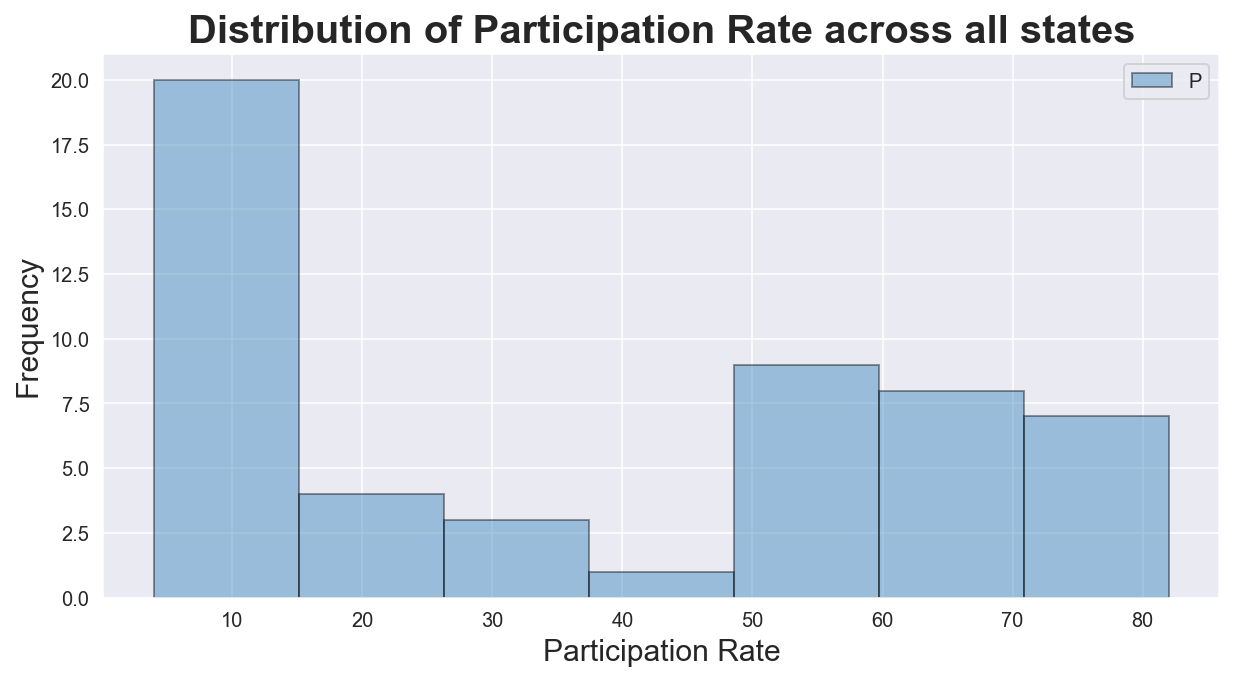

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'darkgrid')

# Plot of distribution of participation rate

plt.figure(figsize = (10,5))

ax_rate = sns.distplot(df_sat['Rate'], kde = False, bins = 'auto', 
                       hist_kws = dict(edgecolor ='black', linewidth=1.0))

ax_rate.set_xlabel('Participation Rate', size = 15)
ax_rate.set_ylabel('Frequency', size = 15)

ax_rate.set_title('Distribution of Participation Rate across all states', size = 20, weight = 'bold')
ax_rate.legend('Participation Rate');

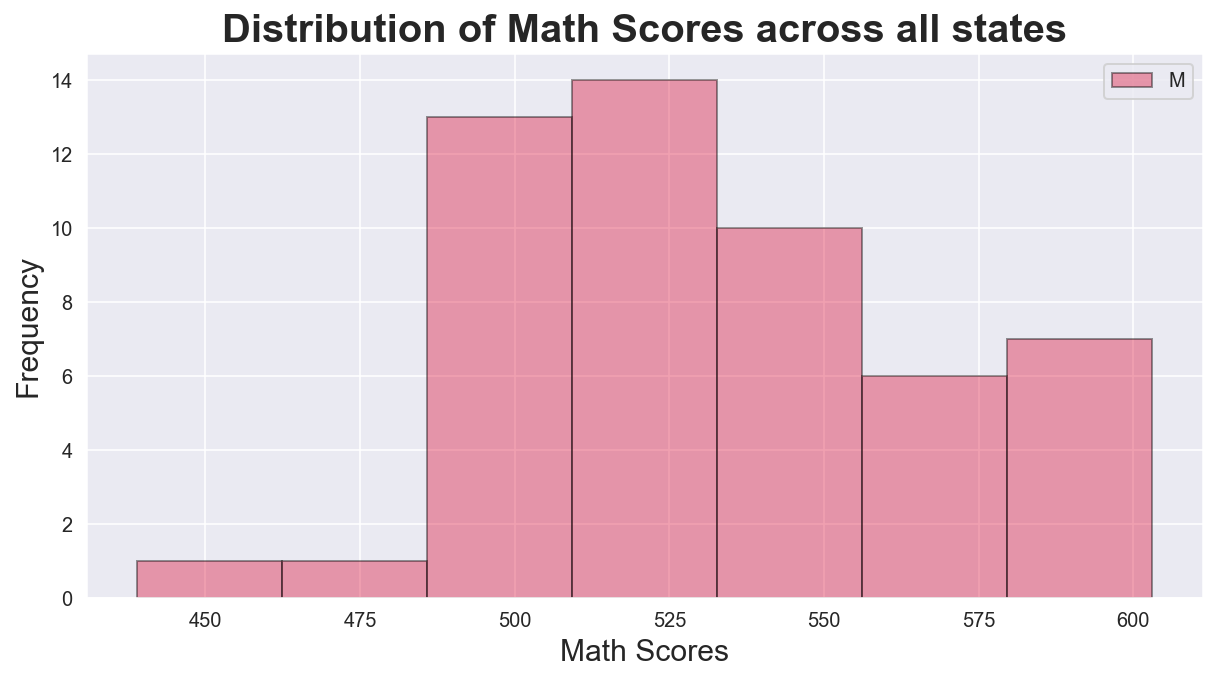

In [9]:
# Plot of distribution of Math scores

plt.figure(figsize = (10,5))

ax_math = sns.distplot(df_sat['Math'], color = 'crimson', kde = False, bins = 'auto',
                      hist_kws = dict(edgecolor = "black", linewidth = 1.0))

ax_math.set_xlabel('Math Scores', size = 15)
ax_math.set_ylabel('Frequency', size = 15)
ax_math.set_title('Distribution of Math Scores across all states', size = 20, weight = 'bold')
ax_math.legend('Math Scores');

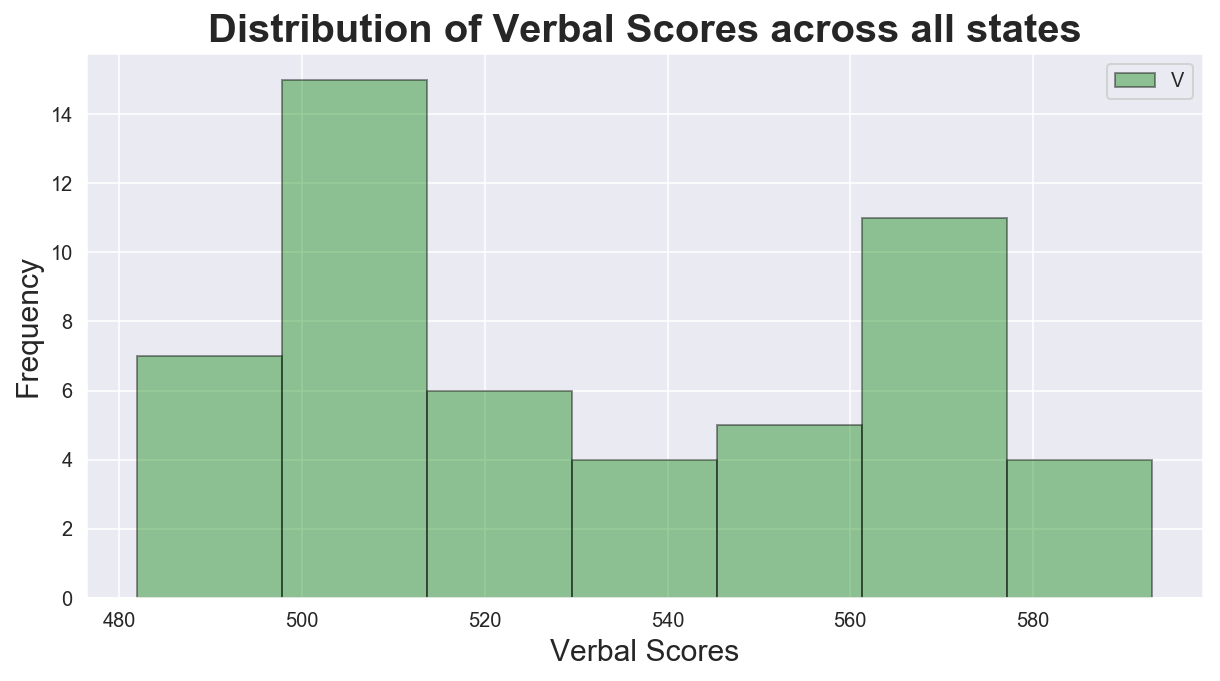

In [10]:
# Plot of distribution of Verbal scores

plt.figure(figsize = (10,5))

ax_verbal = sns.distplot(df_sat['Verbal'], color = 'green', kde = False,
                        bins = 'auto', hist_kws = dict(edgecolor = "black", linewidth = 1.0))
ax_verbal.set_xlabel('Verbal Scores', size = 15)
ax_verbal.set_ylabel('Frequency', size = 15)
ax_verbal.set_title('Distribution of Verbal Scores across all states', size = 20, weight = 'bold')
ax_verbal.legend('Verbal Scores');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

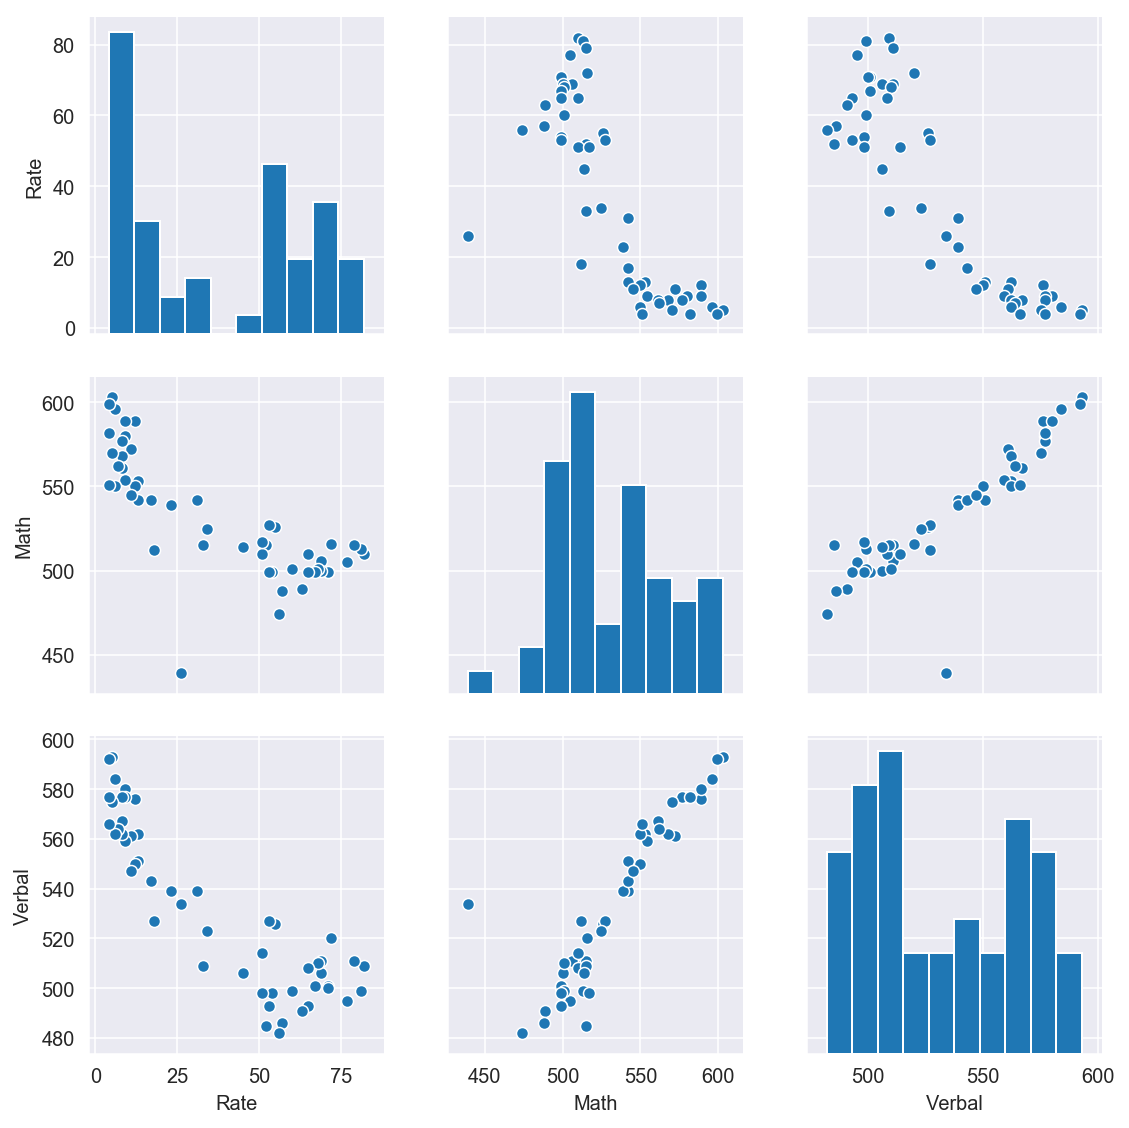

In [11]:
# Plot joint distributions of Rate, Math and Verbal columns

joint_dist = sns.pairplot(df_sat[['Rate', 'Math', 'Verbal']])

joint_dist.fig.set_size_inches(8, 8);

### A: The average Math scores appears to have a strong linear correlation with the average Verbal scores. Participation rate appears to be inversely correlated to average Math scores as well as average Verbal scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

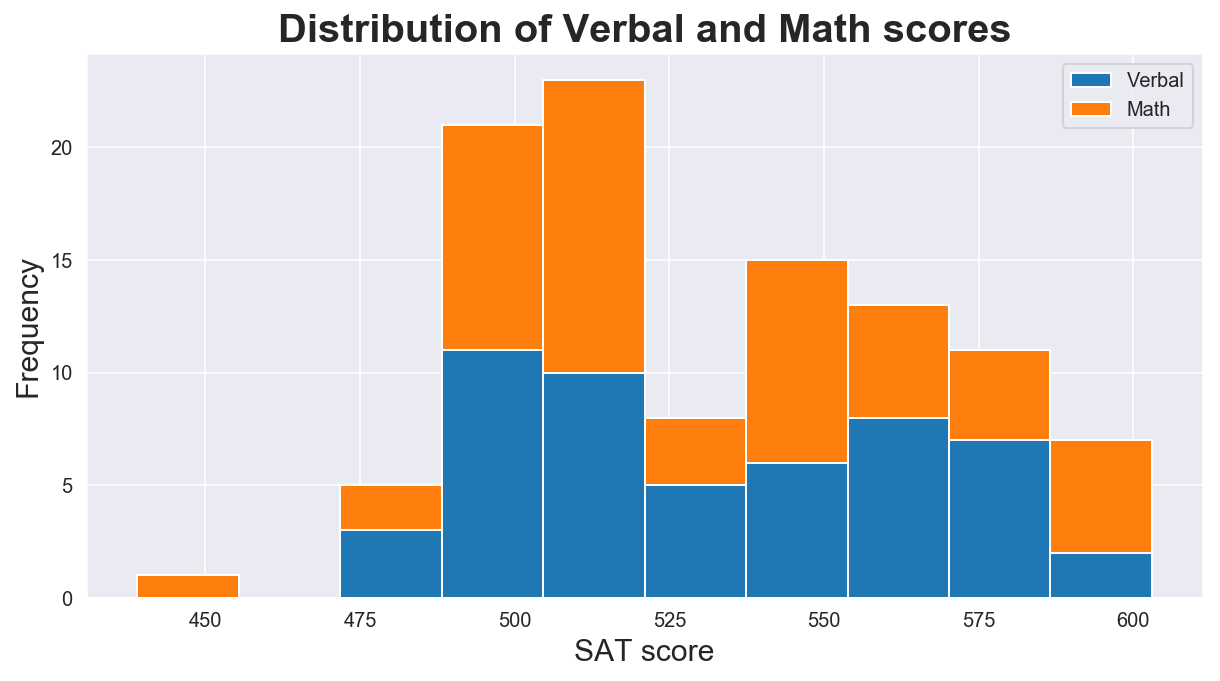

In [12]:
# Stacked histogram with Verbal and Math

df_sat[['Verbal', 'Math']].plot.hist(figsize=(10,5), stacked = True);
plt.xlabel('SAT score', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Distribution of Verbal and Math scores', size = 20, weight = 'bold');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

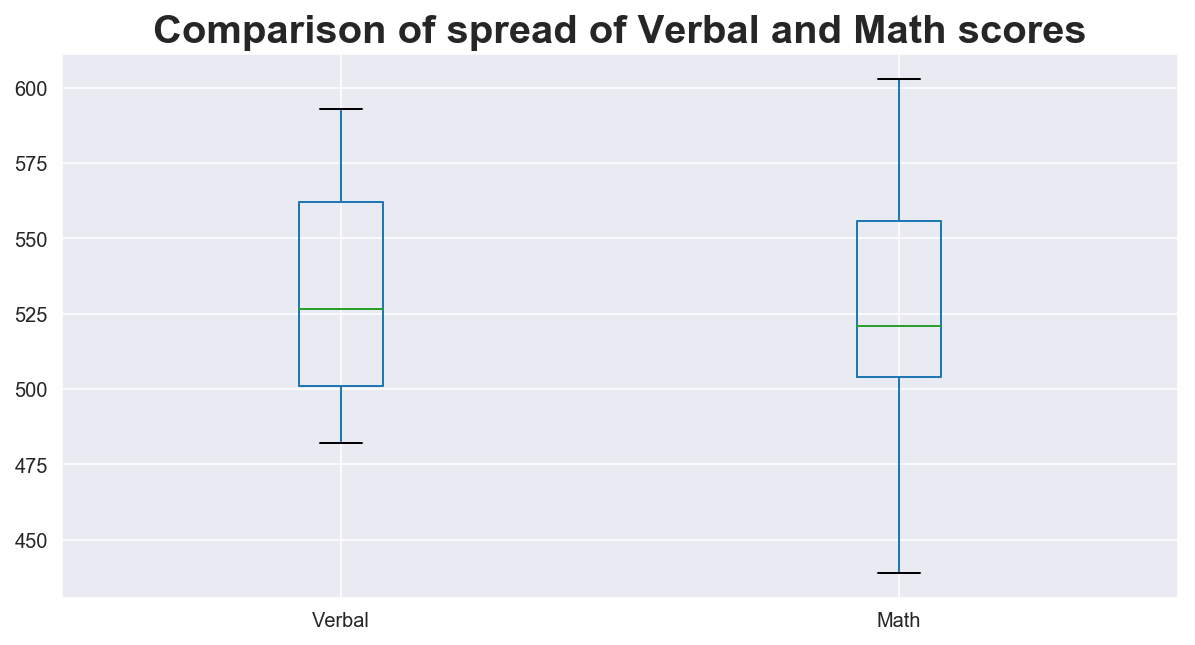

In [13]:
# Boxplot of Verbal and Math scores

df_sat[['Verbal', 'Math']].boxplot(figsize=(10,5));
plt.title('Comparison of spread of Verbal and Math scores', size = 20, weight = 'bold');

### A: A boxplot provides additional useful statistical properties about the distribution such as the median and quartiles that a scatterplot or a histogram does not provide.

### A: The distribution of 'Rate' is between 0 to 100 while the distribution of 'Verbal' and 'Math' are numerical marks on a different scale. If 'Rate' were measured along the same y-axis as 'Verbal' and 'Math', the 'Rate' boxplot will be skewed. 



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### A: I would standardise each of the variables to make the spread of the distributions comparable with one another on the same scale. 

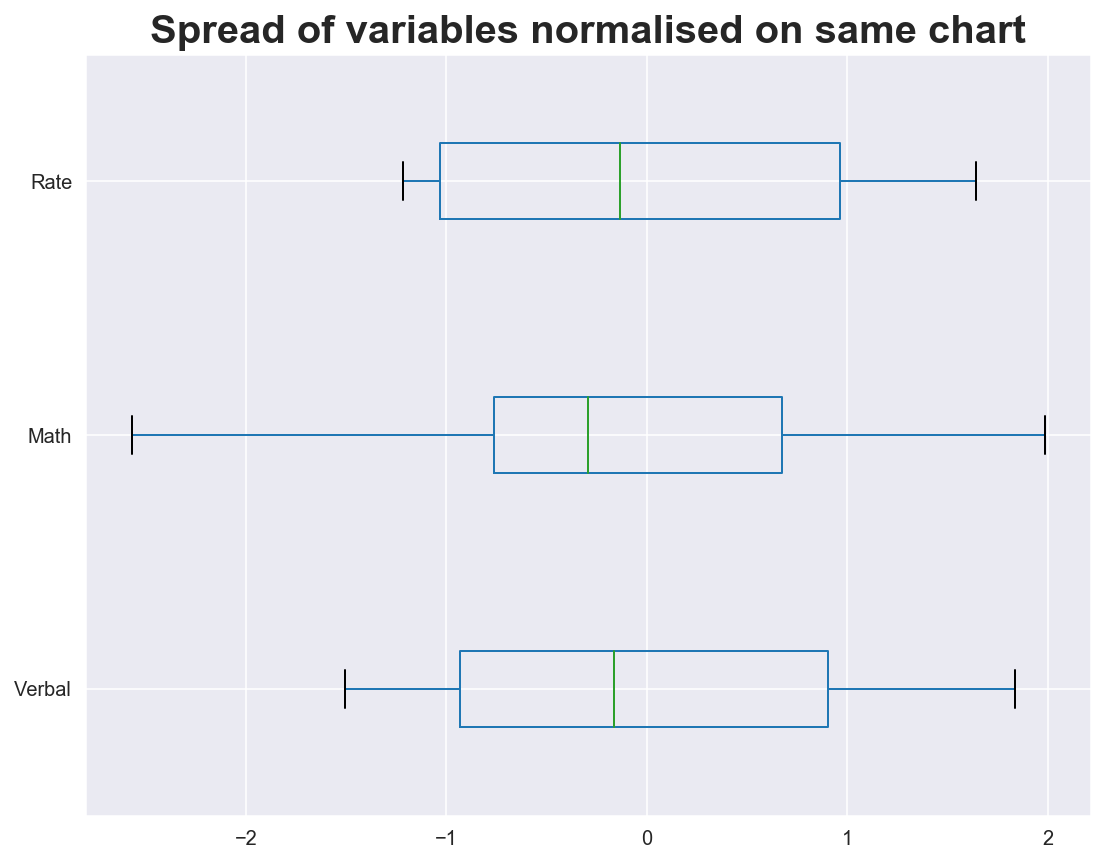

In [14]:
#standardize Verbal, Math and Rate variables

verbal_stand = (df_sat['Verbal'] - df_sat['Verbal'].mean()) / df_sat['Verbal'].std()
math_stand = (df_sat['Math'] - df_sat['Math'].mean()) / df_sat['Math'].std()
rate_stand = (df_sat['Rate'] - df_sat['Rate'].mean()) / df_sat['Rate'].std()


variables_stand = pd.DataFrame(data = [verbal_stand, math_stand, rate_stand])

variables_stand.T.boxplot(figsize=(9, 7), vert = False);
plt.title('Spread of variables normalised on same chart', size = 20, weight = 'bold');

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
df_sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [16]:
avg_verbal = df_sat['Verbal'].mean()

#list of states above the mean
states_above_mean = list(df_sat[df_sat['Verbal'] > avg_verbal]['State'])
print(states_above_mean)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [17]:
print("Mean Verbal Score: {}".format(avg_verbal))
print("Number of states above mean: {}".format(len(states_above_mean)))

Mean Verbal Score: 532.0192307692307
Number of states above mean: 24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
median_verbal = df_sat['Verbal'].median()

#list of states above the median
states_above_median = list(df_sat[df_sat['Verbal'] > median_verbal]['State'])
print(states_above_median)

['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


In [19]:
print("Median Verbal Score: {}".format(median_verbal))
print("Number of states above mean: {}".format(len(states_above_median)))

Median Verbal Score: 526.5
Number of states above mean: 26


### 5.1/5.2 A: Given that the Verbal average score is greater than the Verbal median score, it is indicative that the distribution of Verbal scores is right-skewed. When we use the median score as a filter, there will be more states in the list

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [20]:
verbal_math_diff = pd.DataFrame()

verbal_math_diff['State'] = df_sat['State']

verbal_math_diff['Verbal - Math'] = df_sat['Verbal'] - df_sat['Math']


# Columns of difference between Verbal and Math scores in the respective states
verbal_math_diff.head()

,State,Verbal - Math
0,CT,-1
1,NJ,-14
2,MA,-4
3,NY,-10
4,NH,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [21]:
verbal_morethan_math_states = verbal_math_diff.sort_values(by=['Verbal - Math'], ascending = False)
print("Top 3 states where Verbal score is higher than Math score: \n\n{}".format(verbal_morethan_math_states.head(3)))

Top 3 states where Verbal score is higher than Math score: 

   State  Verbal - Math
27    OH             95
50    MS             15
29    WV             15


In [22]:
math_morethan_verbal_states = verbal_math_diff.sort_values(by=['Verbal - Math'], ascending = True)
print("Top 3 states where Math score is higher than Verbal score: \n\n{}".format(math_morethan_verbal_states.head(3)))

Top 3 states where Math score is higher than Verbal score: 

   State  Verbal - Math
21    HI            -30
23    CA            -19
1     NJ            -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


            Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000


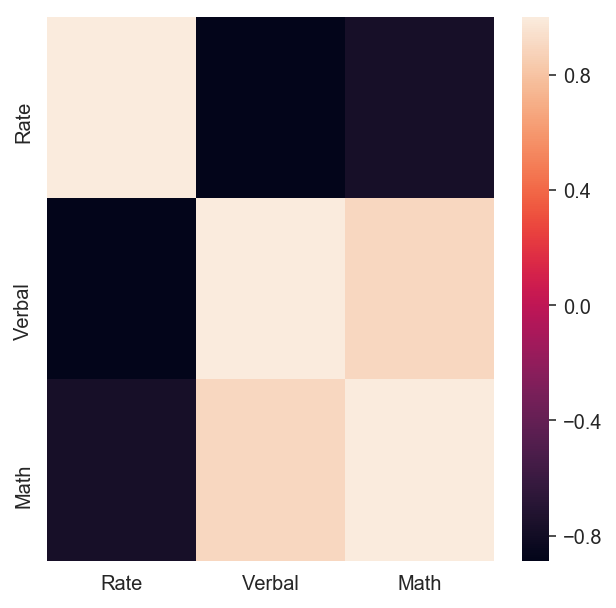

In [23]:
# Data points on extent of correlation
print(df_sat.corr())

# Chart on correlation matrix across Rate, Verbal and Math
sat_scores_corr = df_sat[['Rate', 'Verbal', 'Math']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(sat_scores_corr);

### 1) There appears to be a strong positive linear relationship between Verbal and Math. 

### 2) There appears to be a strong negative linear relationship between Rate and Verbal.

### 3) There appears to be a strong negative linear relationship between Rate and Math as well. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [24]:
df_sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### Description of rows returned by function

- Count indicates the number of rows / values in the column. 
- Mean indicates the mean of values in the column. 
- Std indicates the standard deviation of the values in the column. 
- Min indicates the minimum value in the column. 
- 25% indicates the value at the 25th percentile. 
- 50% indicates the median value. 
- 75% indicates the value at the 75th percentile. 
- Max indicates the maximum value in the column. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

              Rate       Verbal         Math
Rate    745.387632  -804.355958  -760.803922
Verbal -804.355958  1104.646682  1077.147059
Math   -760.803922  1077.147059  1297.078431


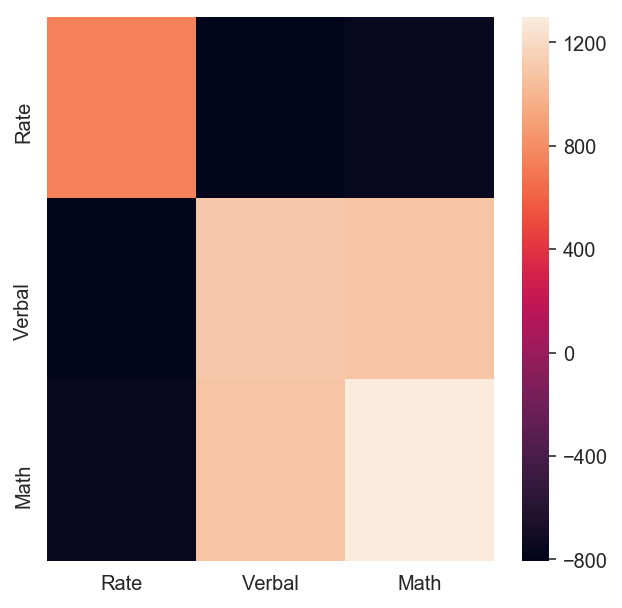

In [25]:
# Data points on extent of covariance
print(df_sat.cov())

# Chart on covariance matrix across Rate, Verbal and Math
sat_scores_cov = df_sat[['Rate', 'Verbal', 'Math']].cov()
plt.figure(figsize=(5,5))
sns.heatmap(sat_scores_cov);

**1) Describe how the covariance matrix is different from the correlation matrix.**

Covariance is defined as the linear relationship between a pair of random variables. A positive covariance indicates that the variables are positively related, while a negative covariances indicates that the variables are inversely related. Covariance can be used to determine whether units are increasing or decreasing, but it is impossible to measure the degree to which the variables moved together because covariance does not use one standard unit of measurement.

The correlation matrix, on the other hand, measures the degree by which two variables are correlated on the same scale between -1 and 1. 1 means the two variables are exactly positively correlated while -1 means the two variables are exactly positively correlated. 

---

**2) What is the process to convert the covariance into the correlation?**

Correlation matrix = Covariance(x,y)/ (std.dev(x)*std.dev(y))

---

**3) Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?**

Given that covariance can be distorted by the sample size, and the fact that covariance cannot tell us how much two selected variables move in tandem along the same axis, correlation matrix is preferred instead to examine relationships in data. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [26]:
# Load data set
df_drug = pd.read_csv('./drug-use-by-age.csv')

In [27]:
df_drug.shape

(17, 28)

In [28]:
df_drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


**Observations from above dataset**
- The values in the age column are unevenly distributed, with a mix of single values and ranges. Even the age ranges are not consistent, covering between 2 to 15 ages. However, the age ranges covered are exhaustive (no gaps in data) and there might have been an empirical reason behind how the age ranges are clustered.

- All columns should have numeric values. This is consistent with the column header definitions. The headers that end with '-use' are percentages while the headers that end with '-frequency' are medians. There appears to be some values with '-'. This might have to be converted to another format.

In [29]:
# check if there are any null values across the dataset
df_drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

**Observations**
- There are no null values across the dataset

In [30]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

**Observations**
- n is the sample size and is expected to be an integer.
- The column header definitions should be of 'float' type since they are all numeric. However, some of the columns are of 'string' type. On further inspection of these columns, it appears that is because there are cells with '-'. These will be replaced by np.NaN values. 

In [31]:
# Clean up data set by replaciing all cells of '-' value with np.NaN

df_drug.loc[:, 'alcohol-use' :] = df_drug.loc[:, 'alcohol-use' :].apply(lambda x : x.replace("-", np.nan).astype('float64'), axis = 1)


# Verify that all '-use' and '-frequency' columns have been converted to float. 
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [32]:
df_drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

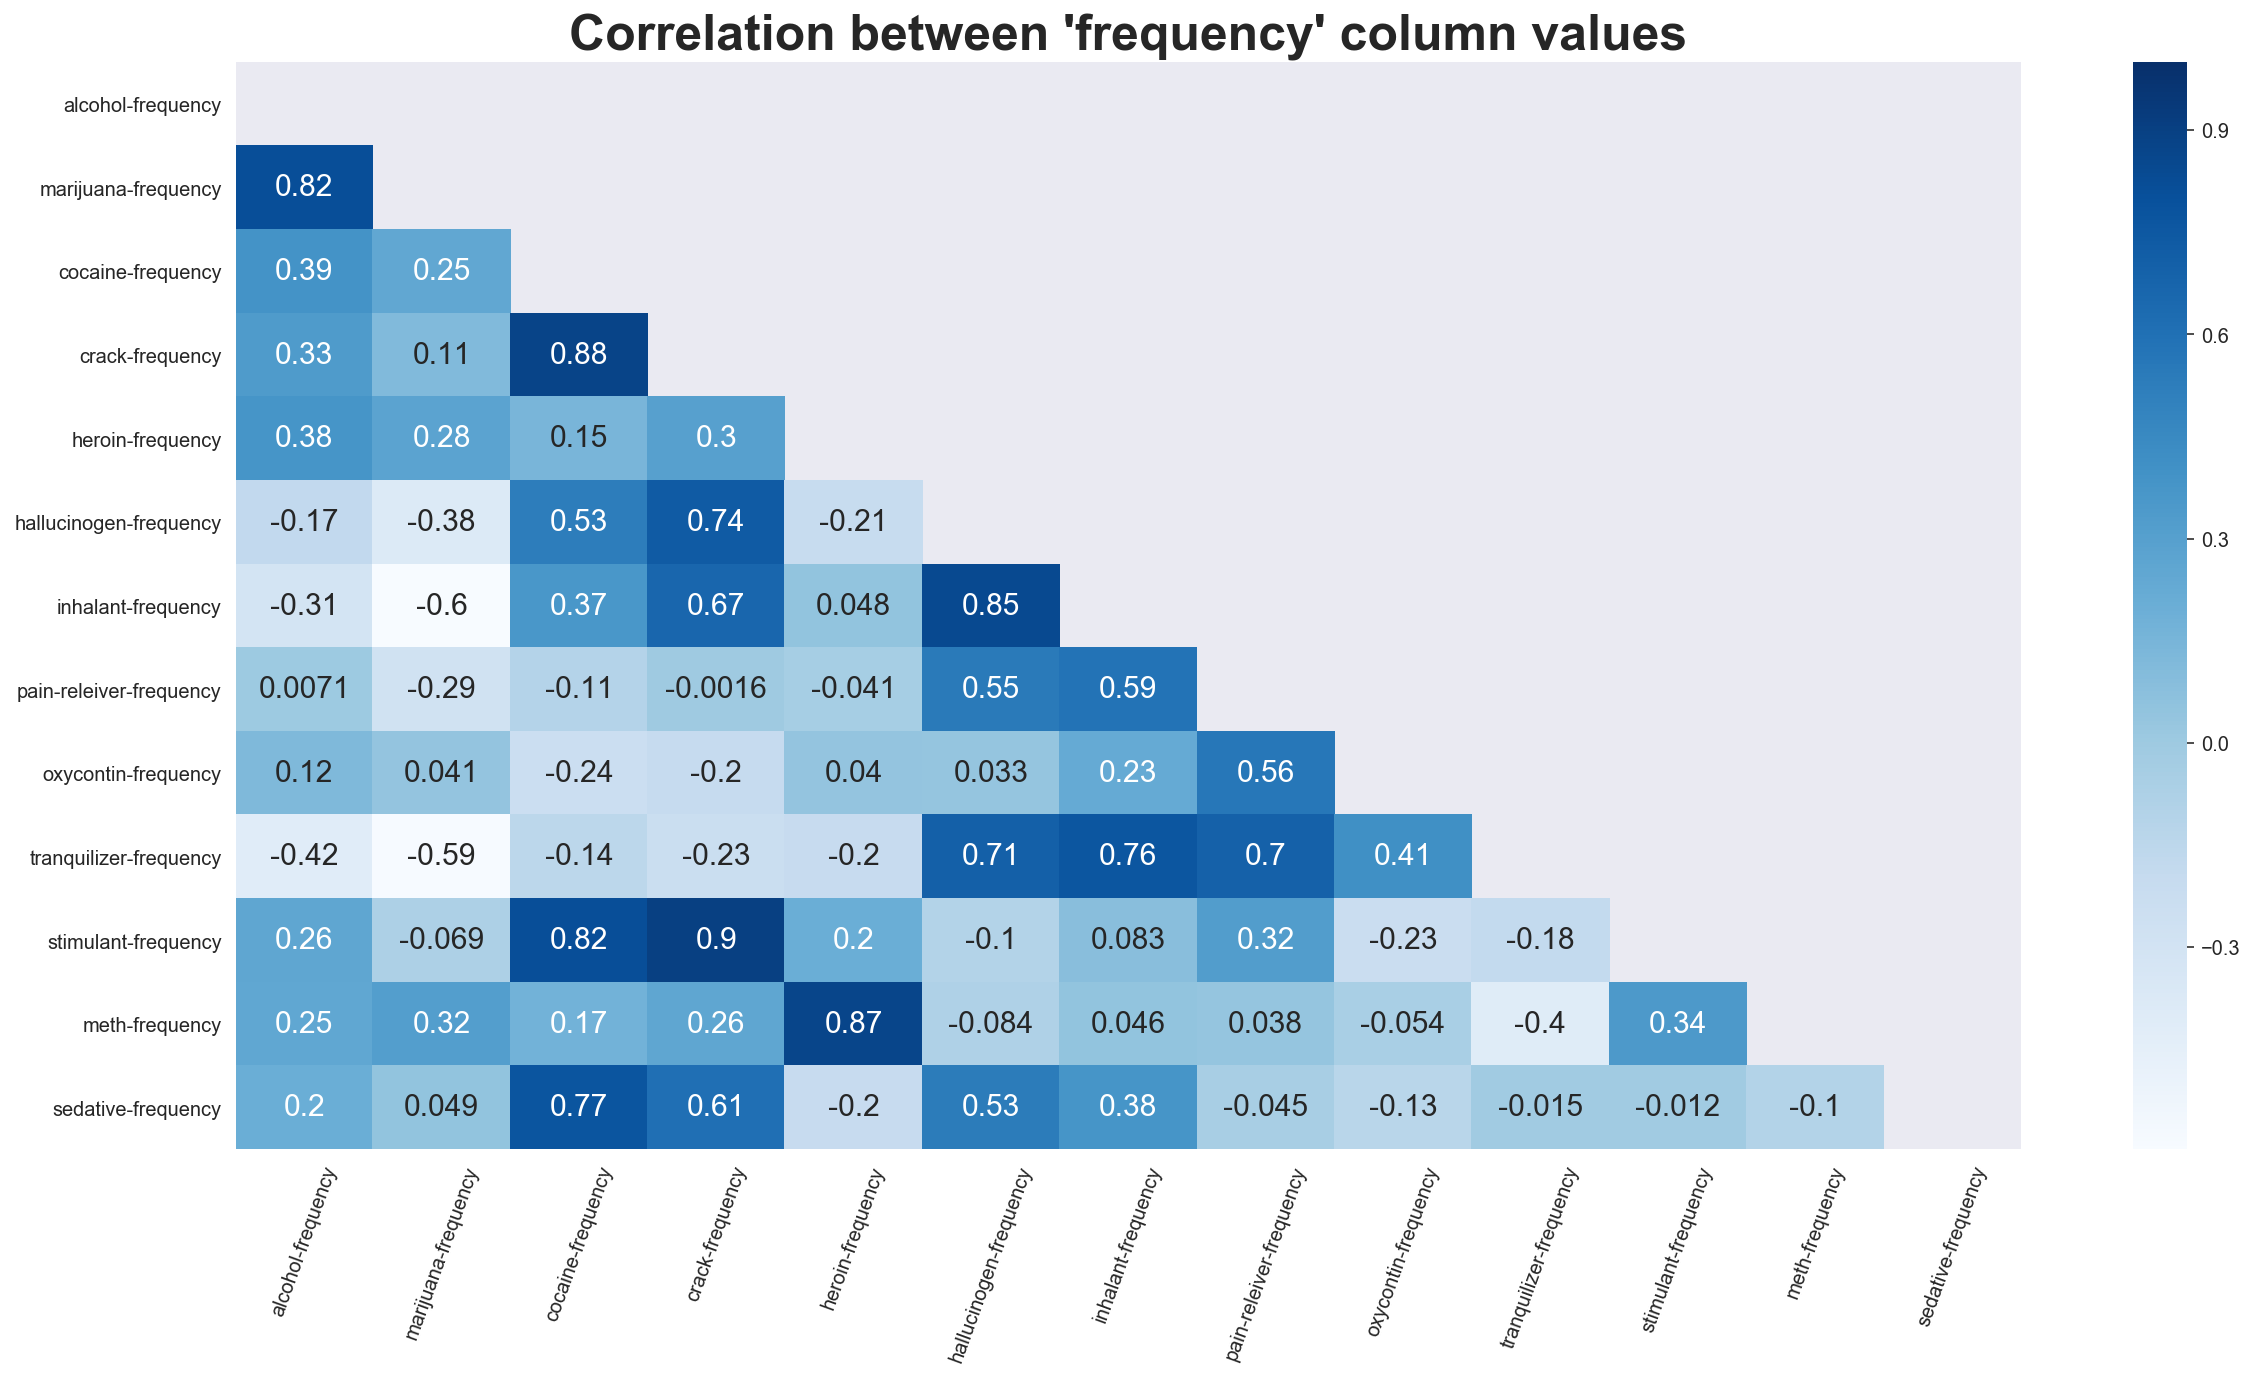

In [33]:
#Check correlation across '-frequency' (median no. of times a type of drug is consumed by each age group) datapoints. 

drug_freq_columns = [name for name in df_drug.columns if 'frequency' in name]

plt.figure(figsize = (20, 10))
mask_top_half = np.zeros_like(df_drug[drug_freq_columns].corr(), dtype = np.bool)
mask_top_half[np.triu_indices_from(mask_top_half)] = True
ax_freq_correlation = sns.heatmap(df_drug[drug_freq_columns].corr(), annot = True, annot_kws = {"size": 15}, cmap = "Blues", mask = mask_top_half)

ax_freq_correlation.set_title("Correlation between 'frequency' column values", size = 25, weight = 'bold')
ax_freq_correlation.set_xticklabels(labels = drug_freq_columns, rotation=70);

### Based on the drug frequency chart, there is strong positive correlation (> 0.75) across some of the following drug types:

- Marijuana and Alcohol
- Cocaine and Crack
- Cocaine and Stimulant
- Crack and Stimulant
- Cocaine and Sedative
- Heroin and Meth
- Inhalant and Hallucinogen
- Inhalant and Tranquilizer 

It is highly likely that some of these drugs may be highly correlated because they have similar uses/traits, and thus may be from the same drug family group. 

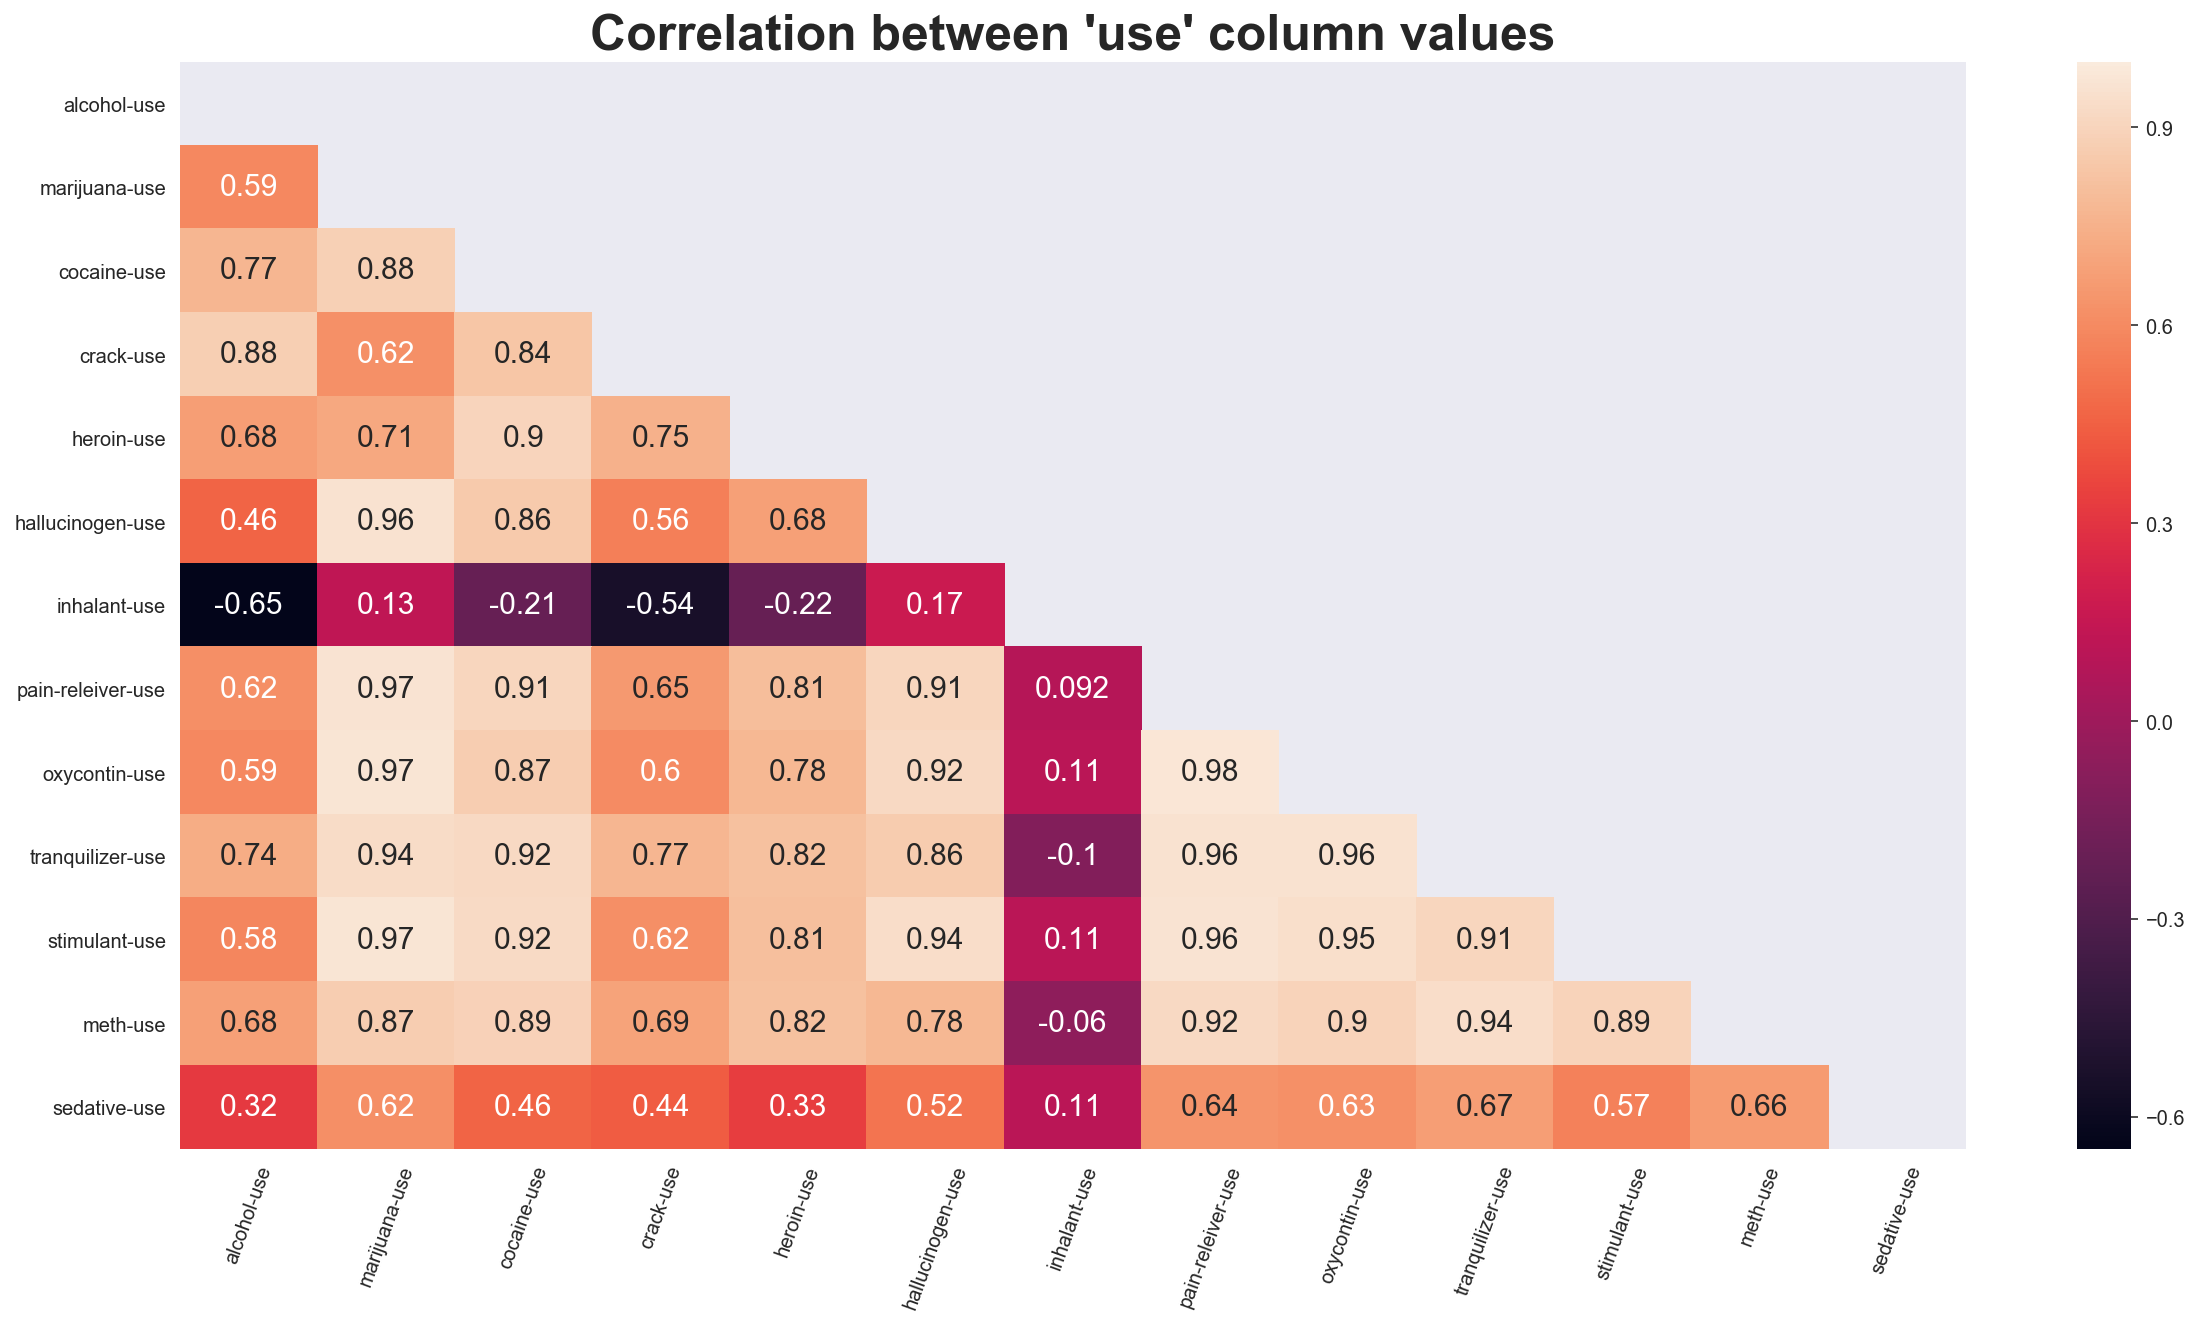

In [34]:
#Check correlation across '-use' (Percentage of each age group who used each of the drugs) datapoints. 

drug_use_columns = [name for name in df_drug.columns if 'use' in name]

plt.figure(figsize = (20, 10))
mask_top_half = np.zeros_like(df_drug[drug_use_columns].corr(), np.bool)
mask_top_half[np.triu_indices_from(mask_top_half)] = True
ax_use_correlation = sns.heatmap(df_drug[drug_use_columns].corr(), annot = True, annot_kws = {"size": 15}, mask = mask_top_half)
ax_use_correlation.set_title("Correlation between 'use' column values", size = 25, weight = 'bold')
ax_use_correlation.set_xticklabels(labels = drug_use_columns, rotation = 70);

### Based on the drug use chart, there is strong positive correlation (> 0.75) across almost all the drug types, with the exception of alcohol and Inhalant. 

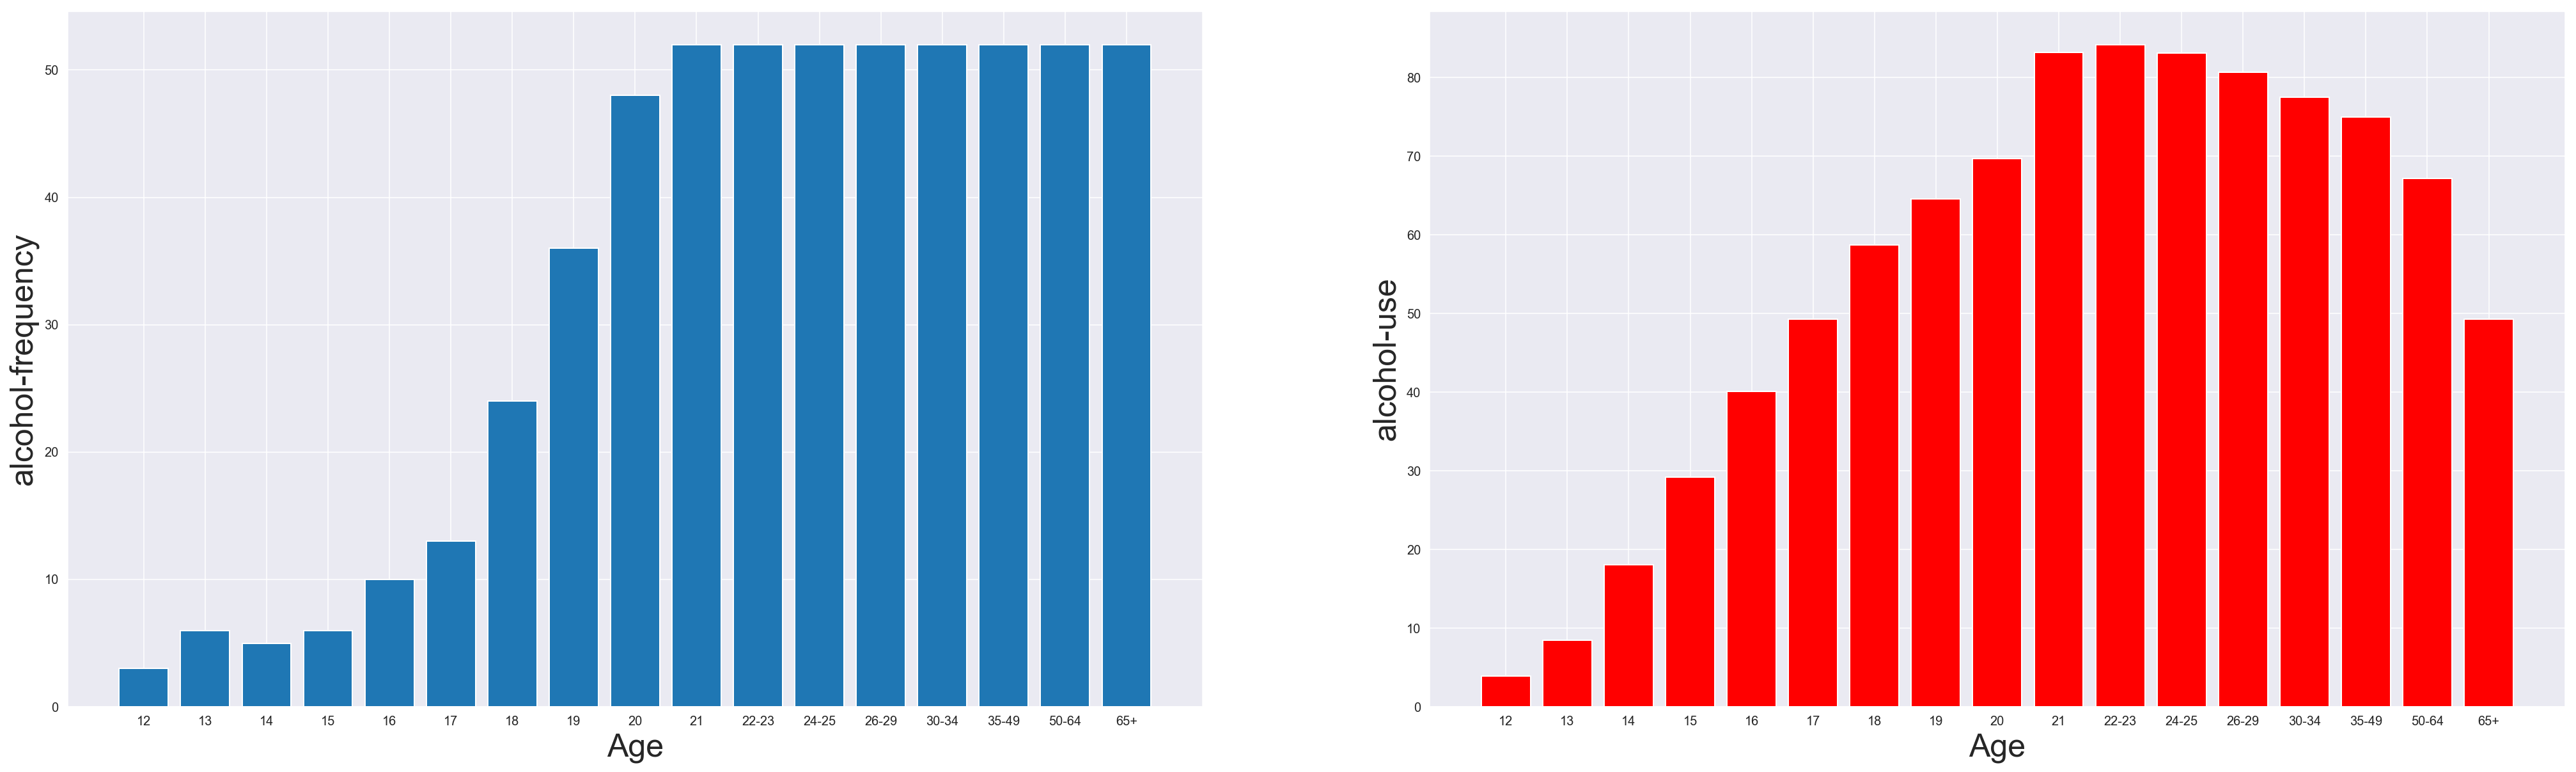

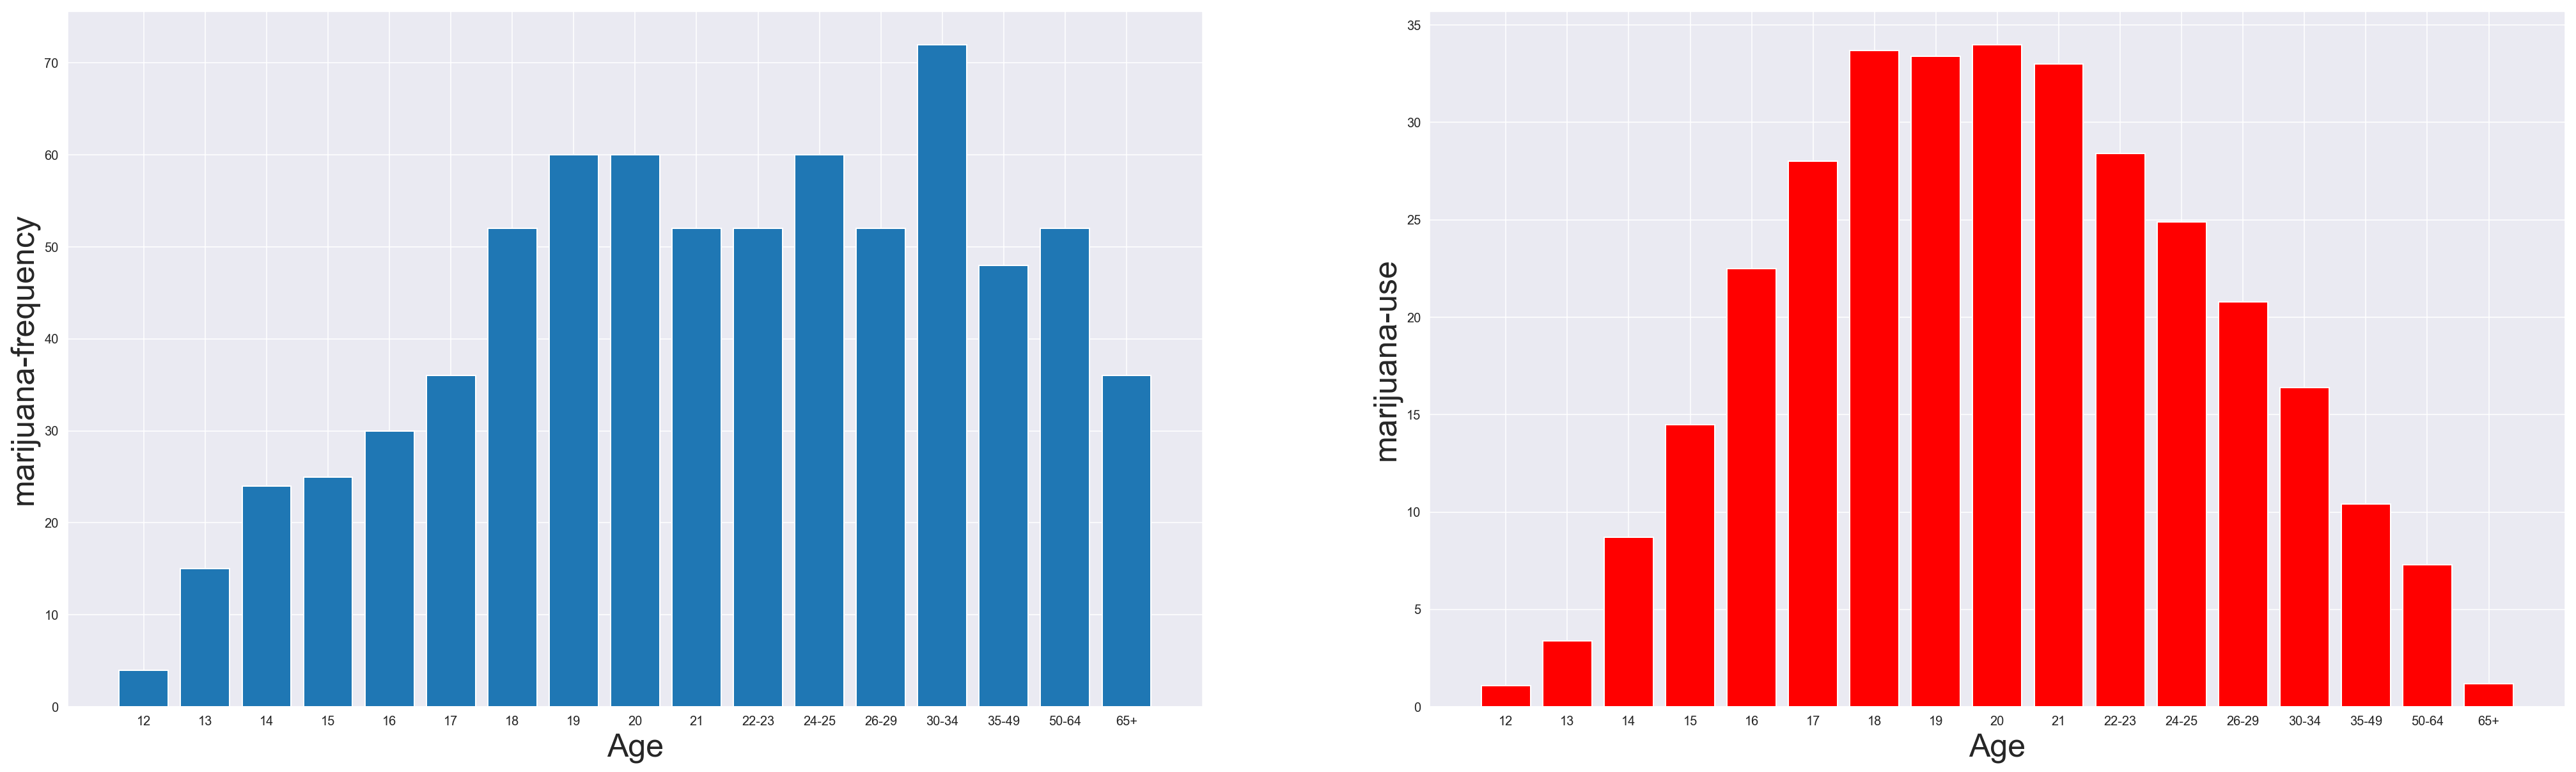

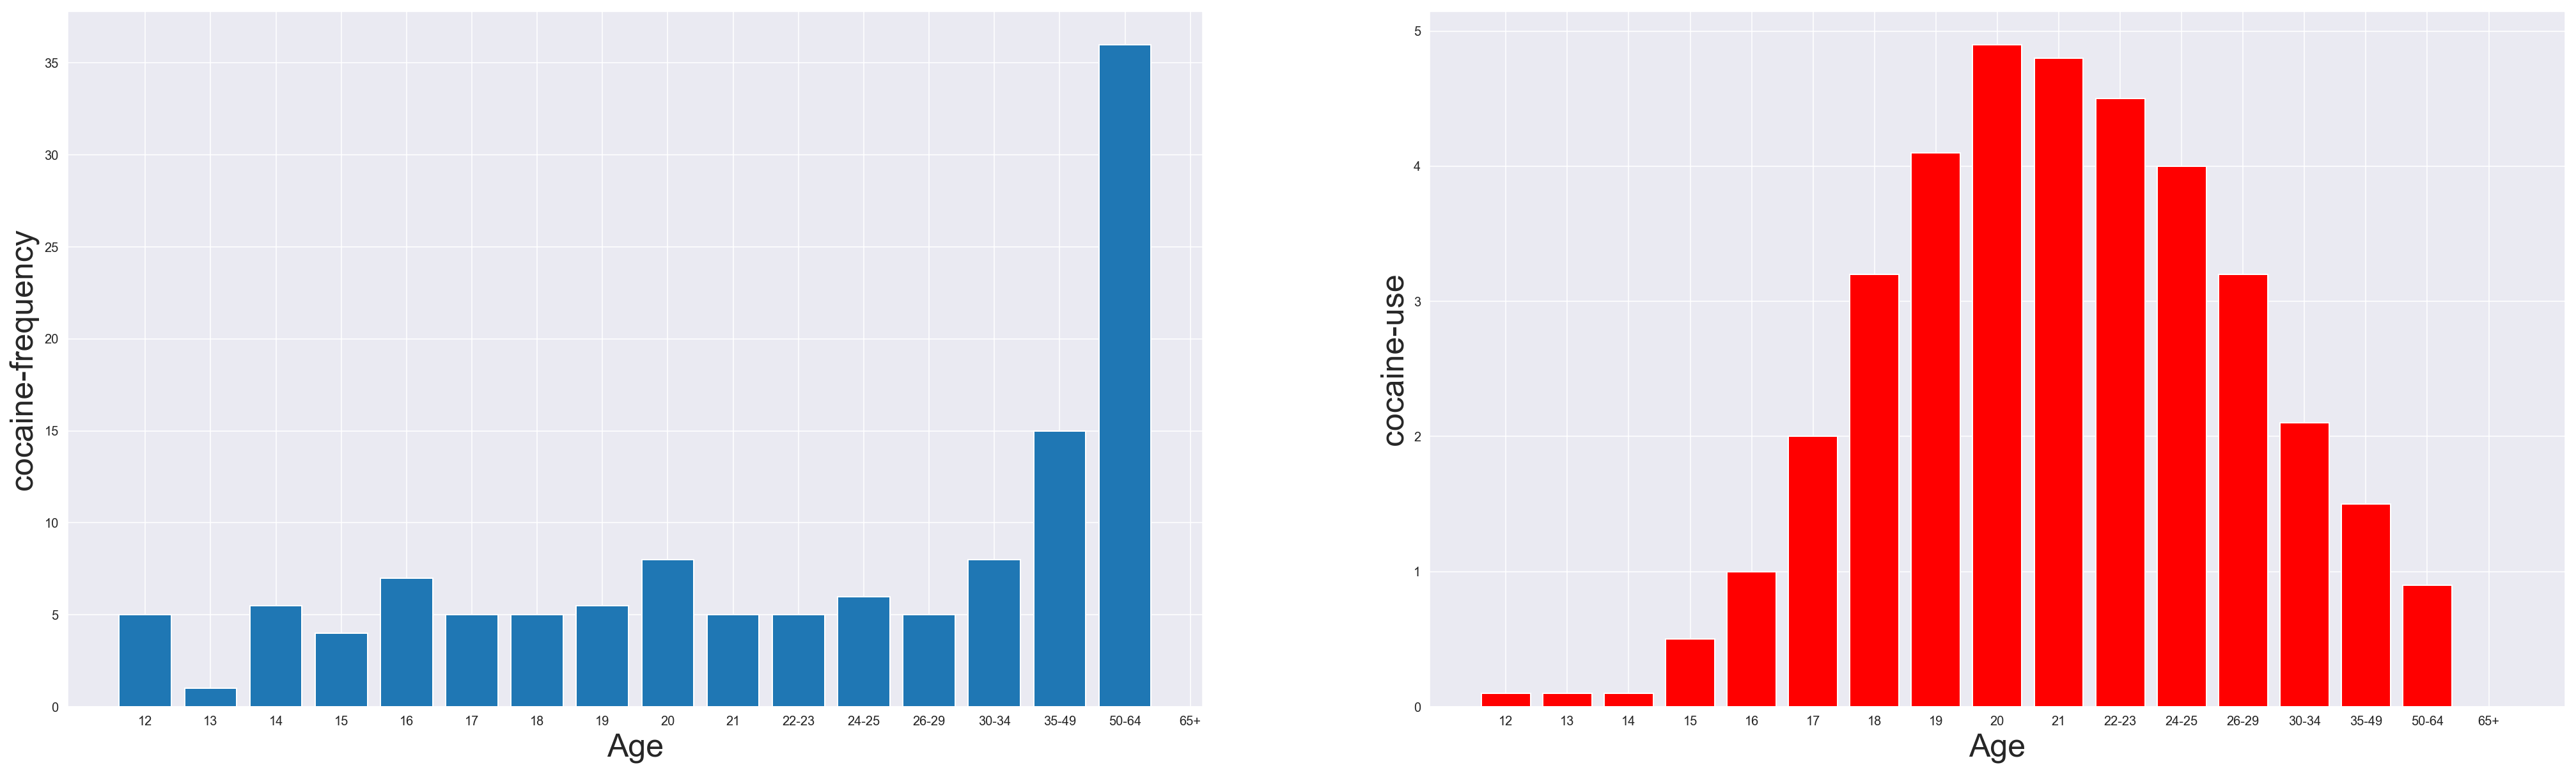

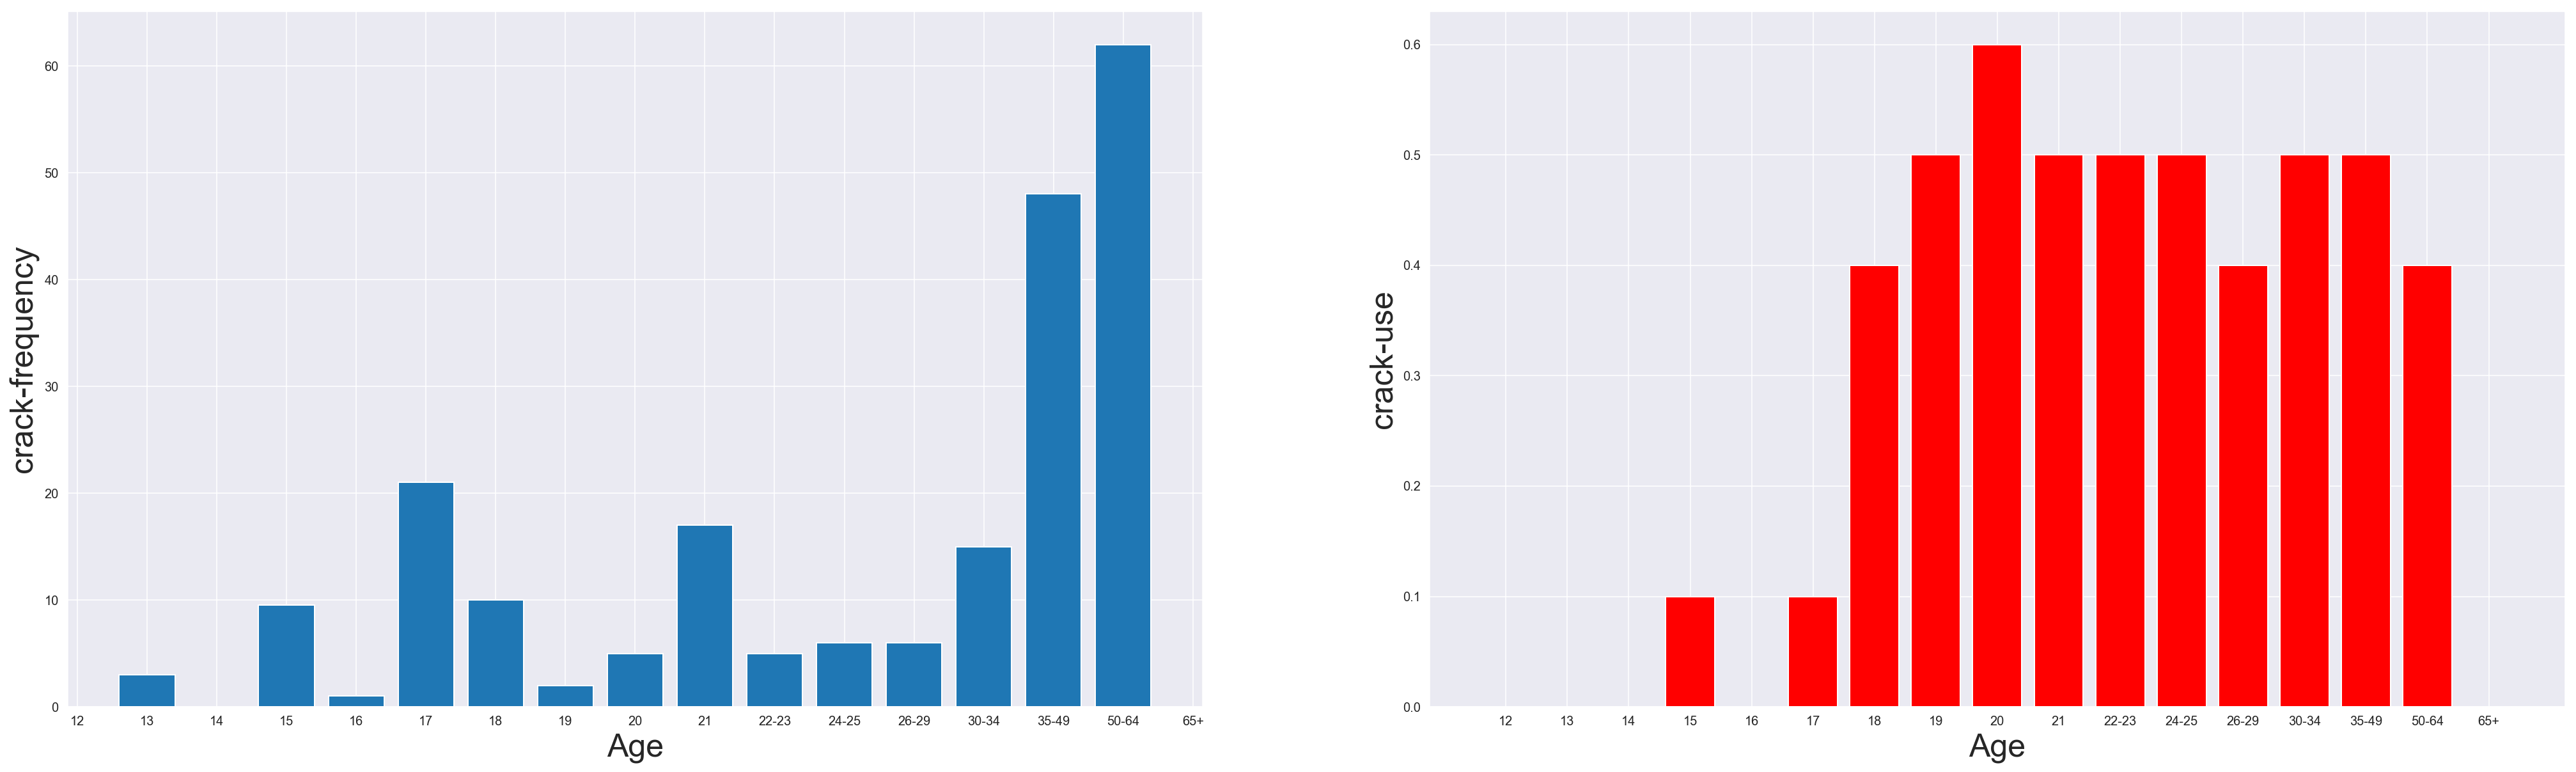

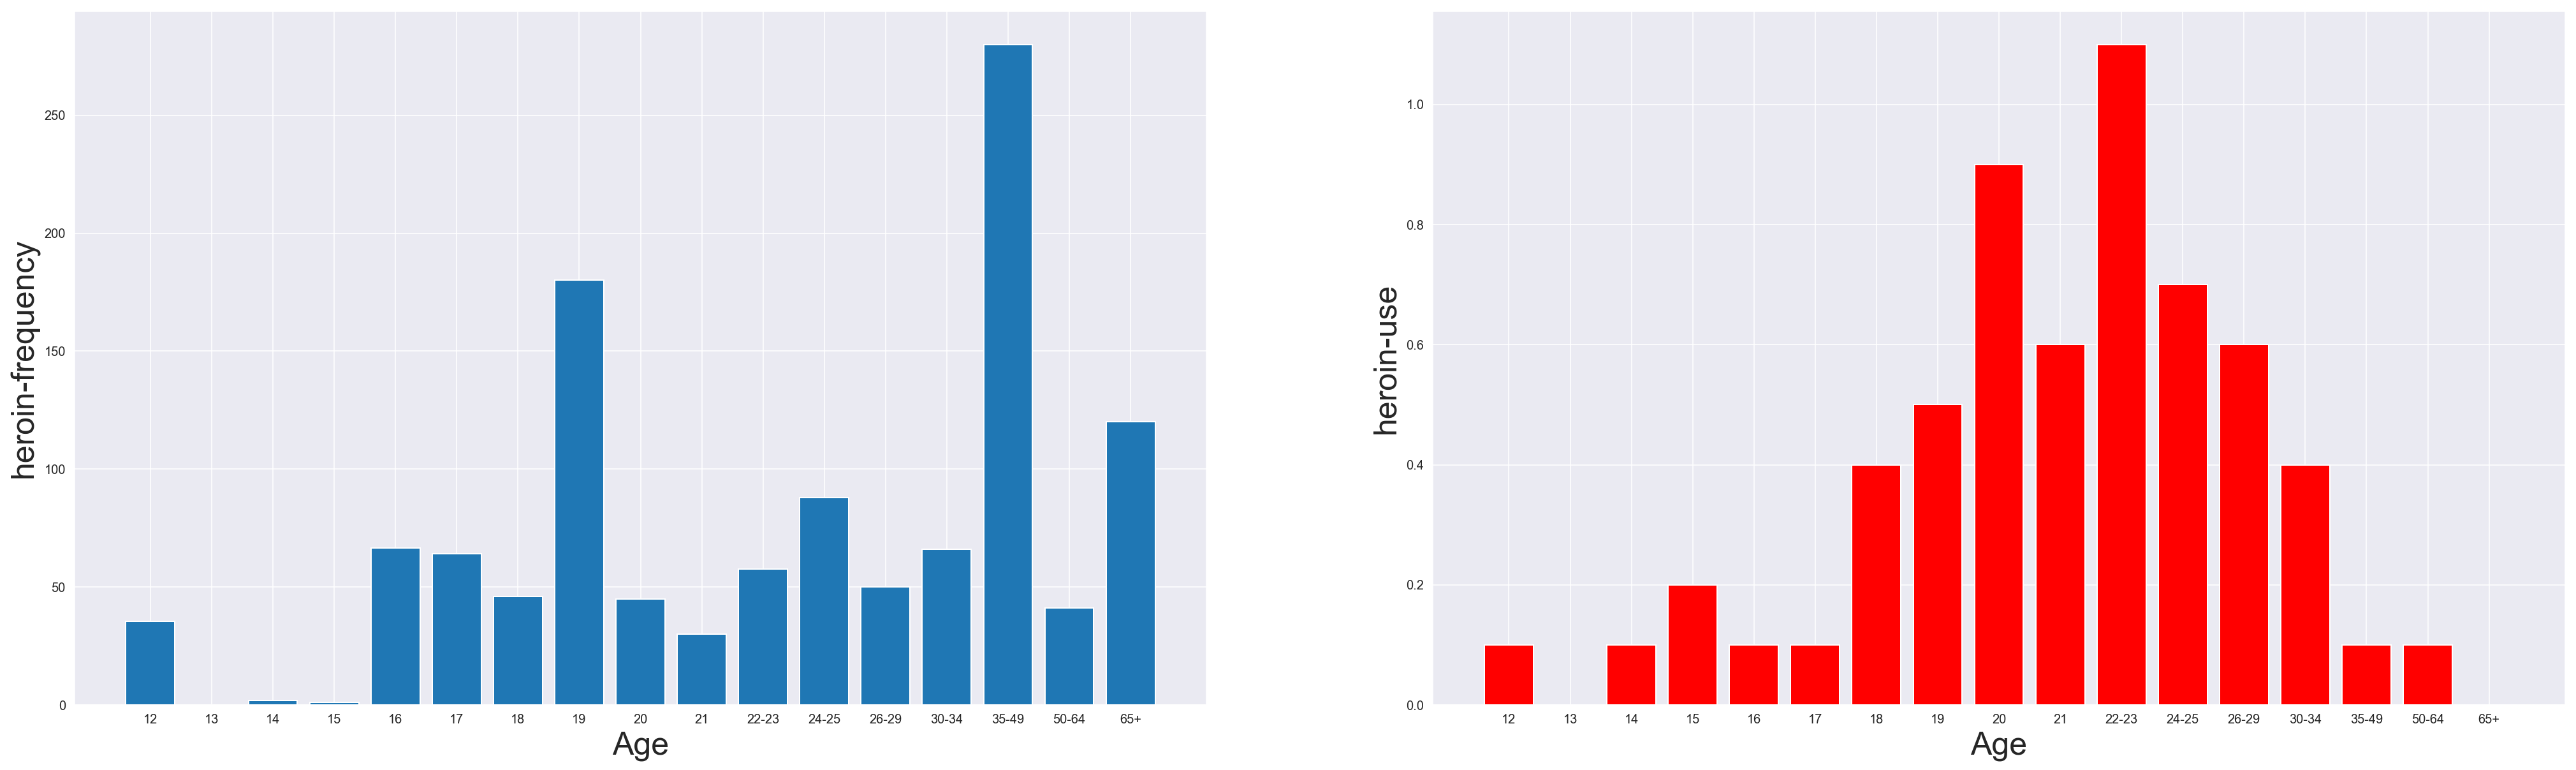

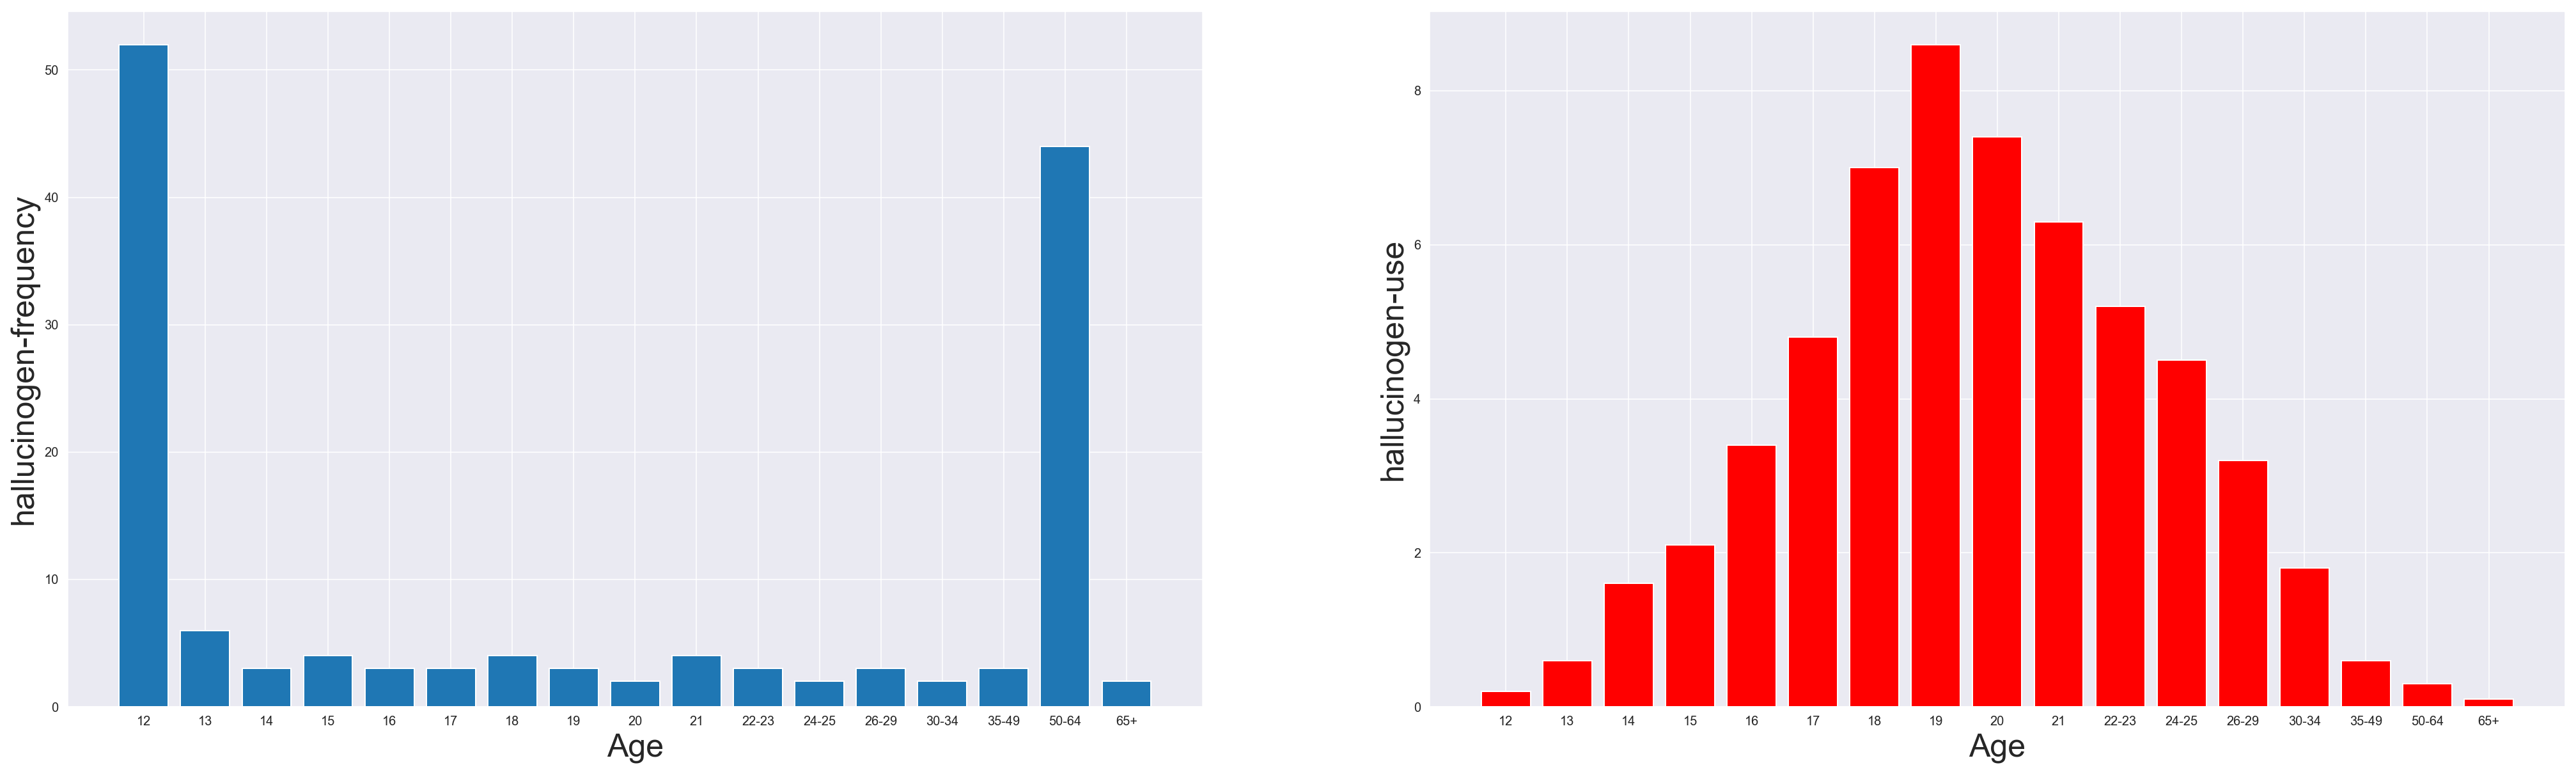

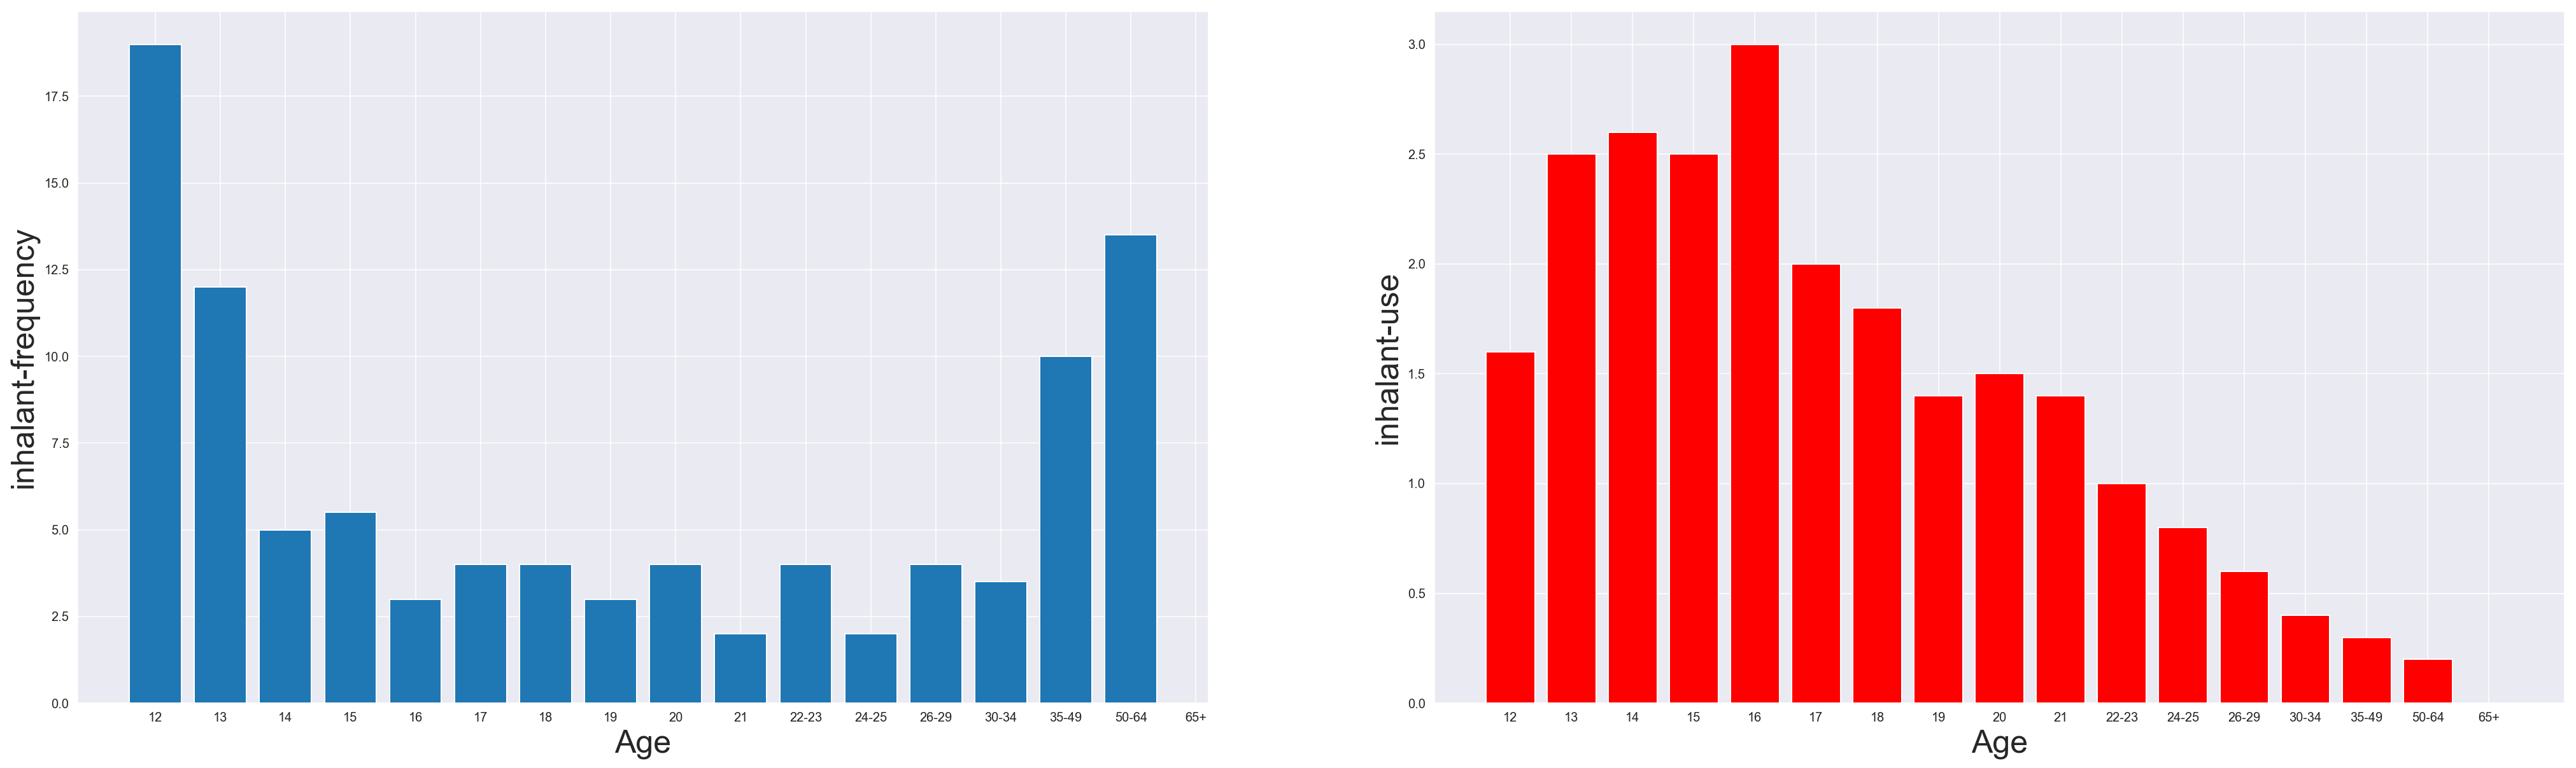

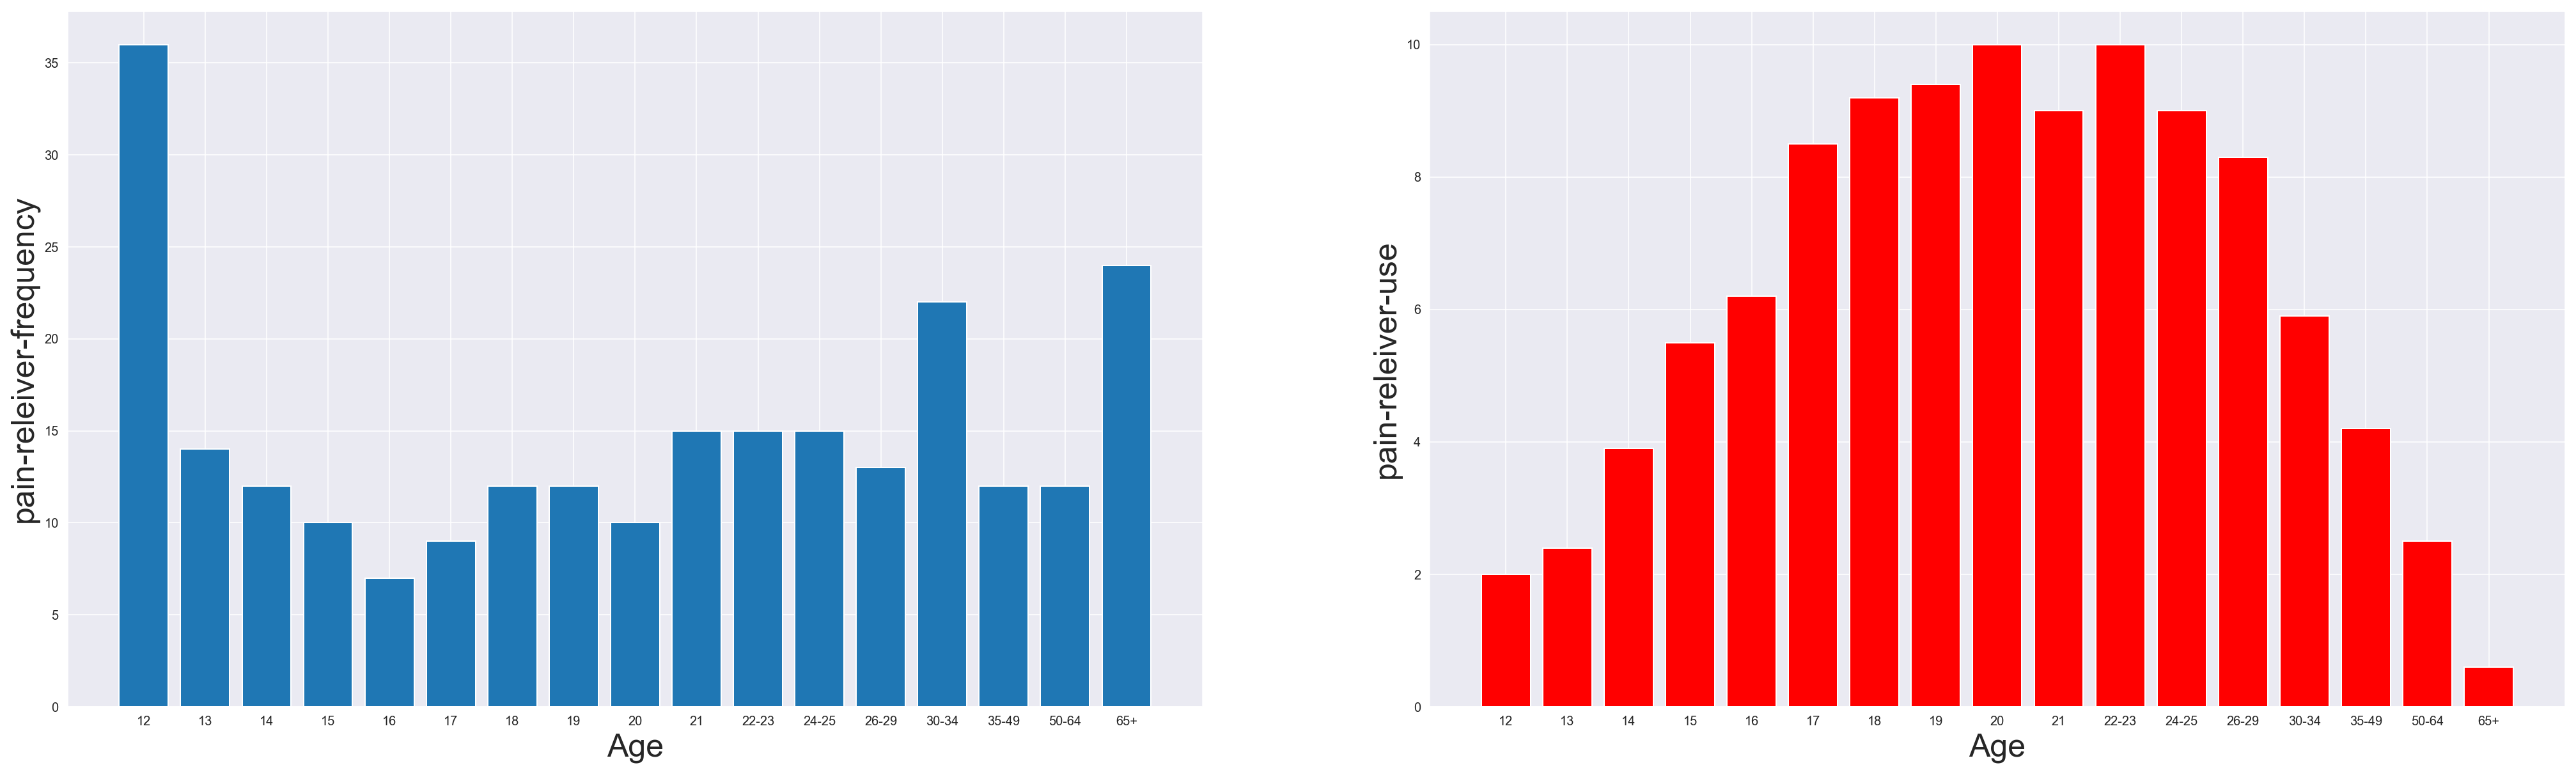

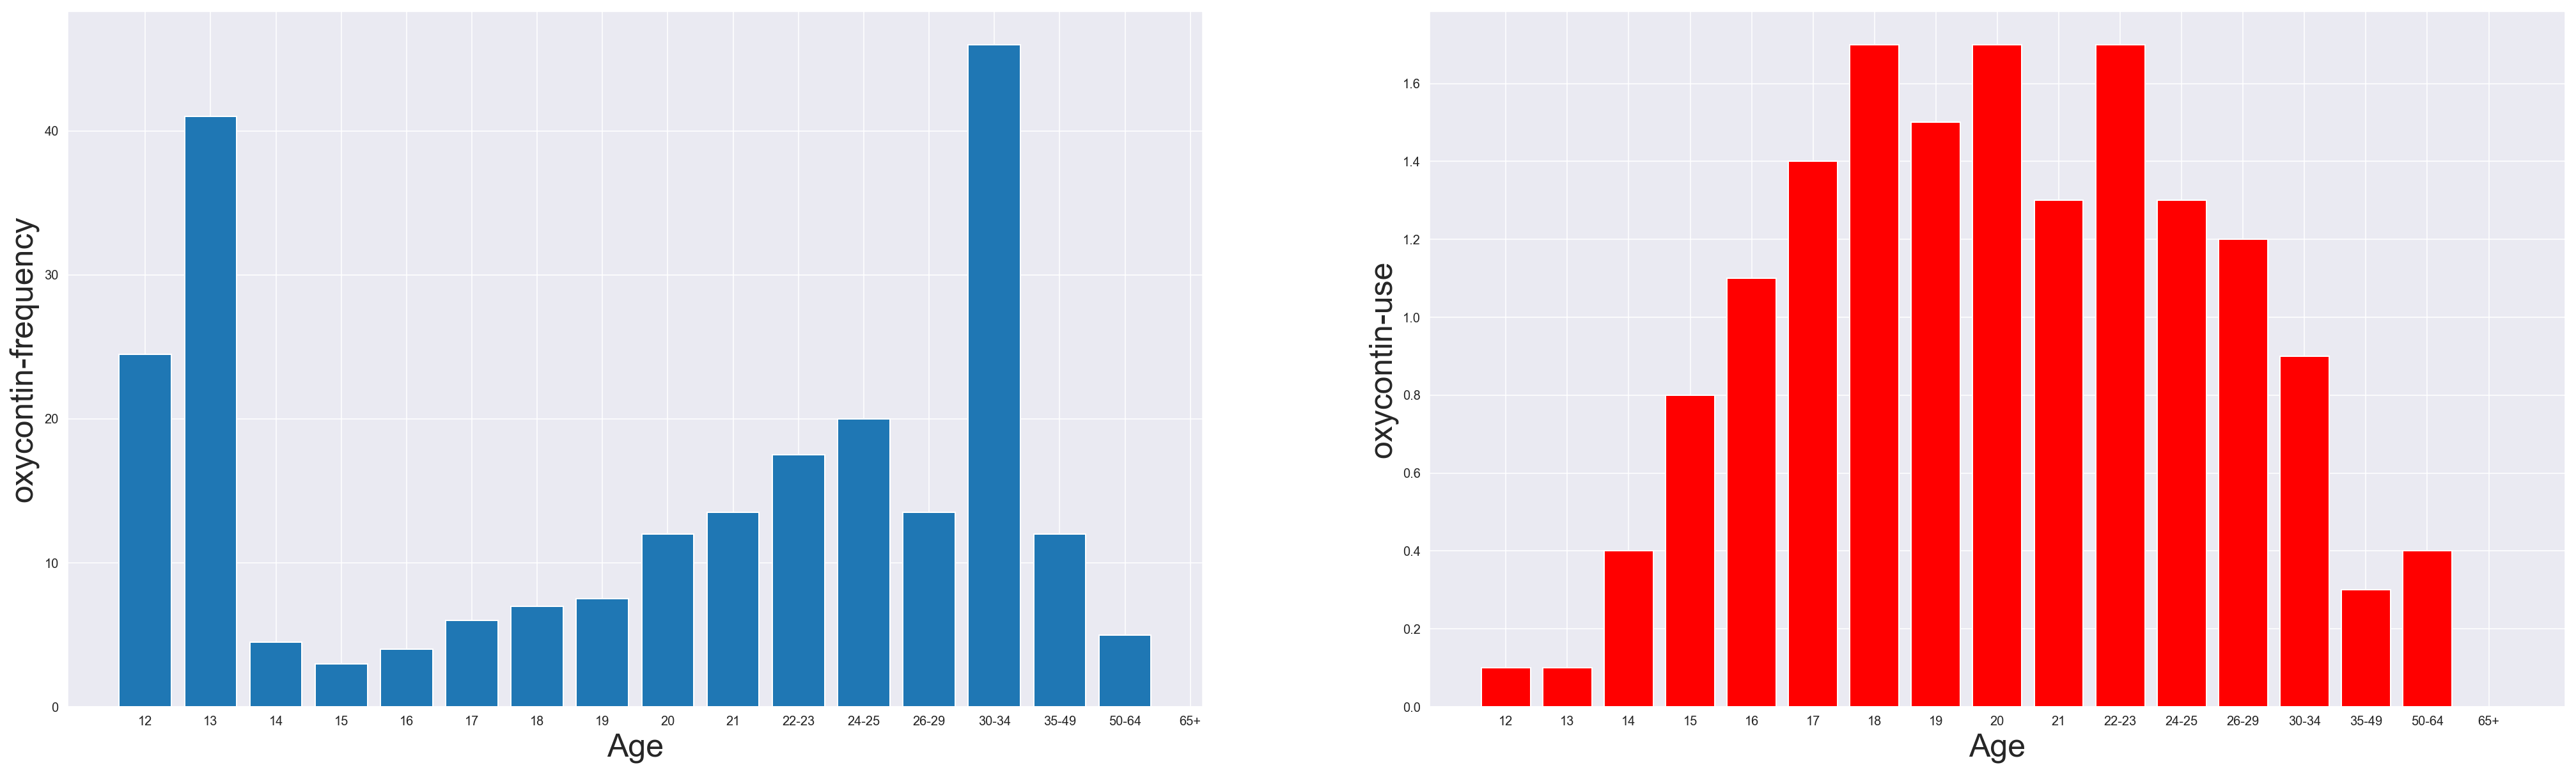

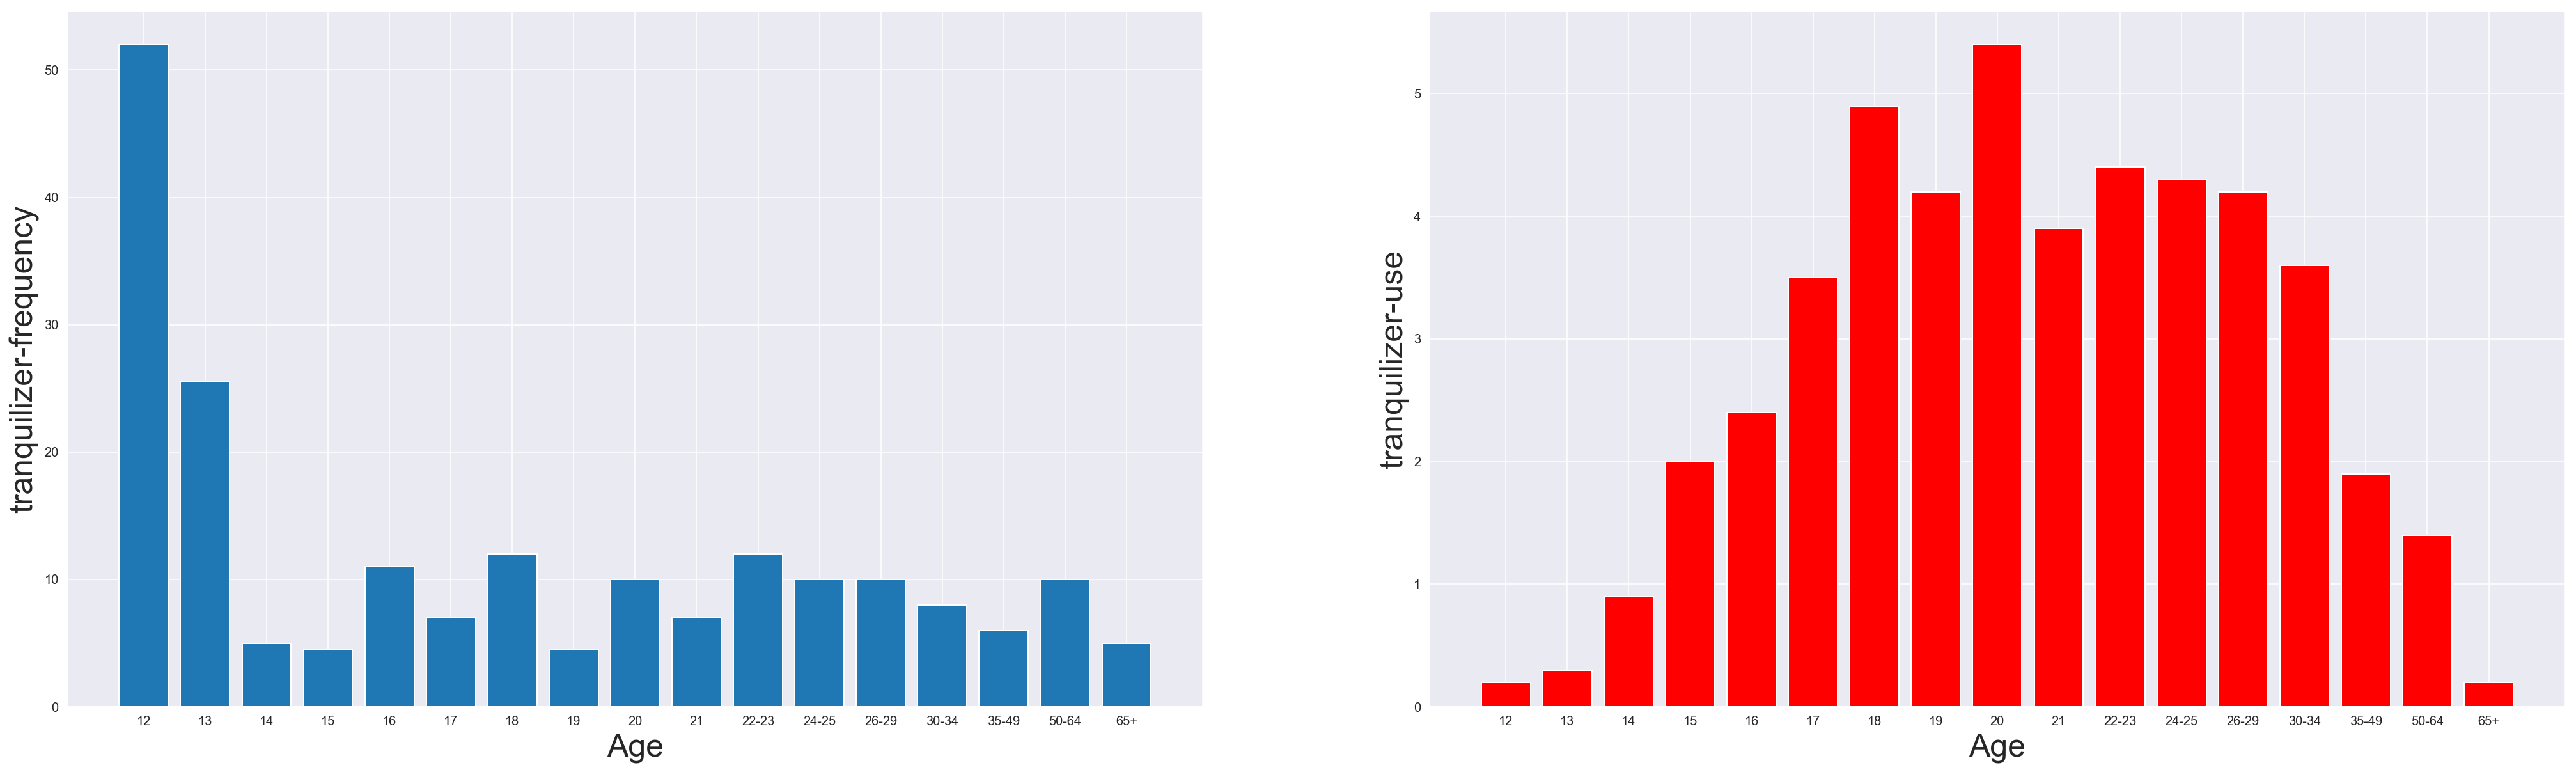

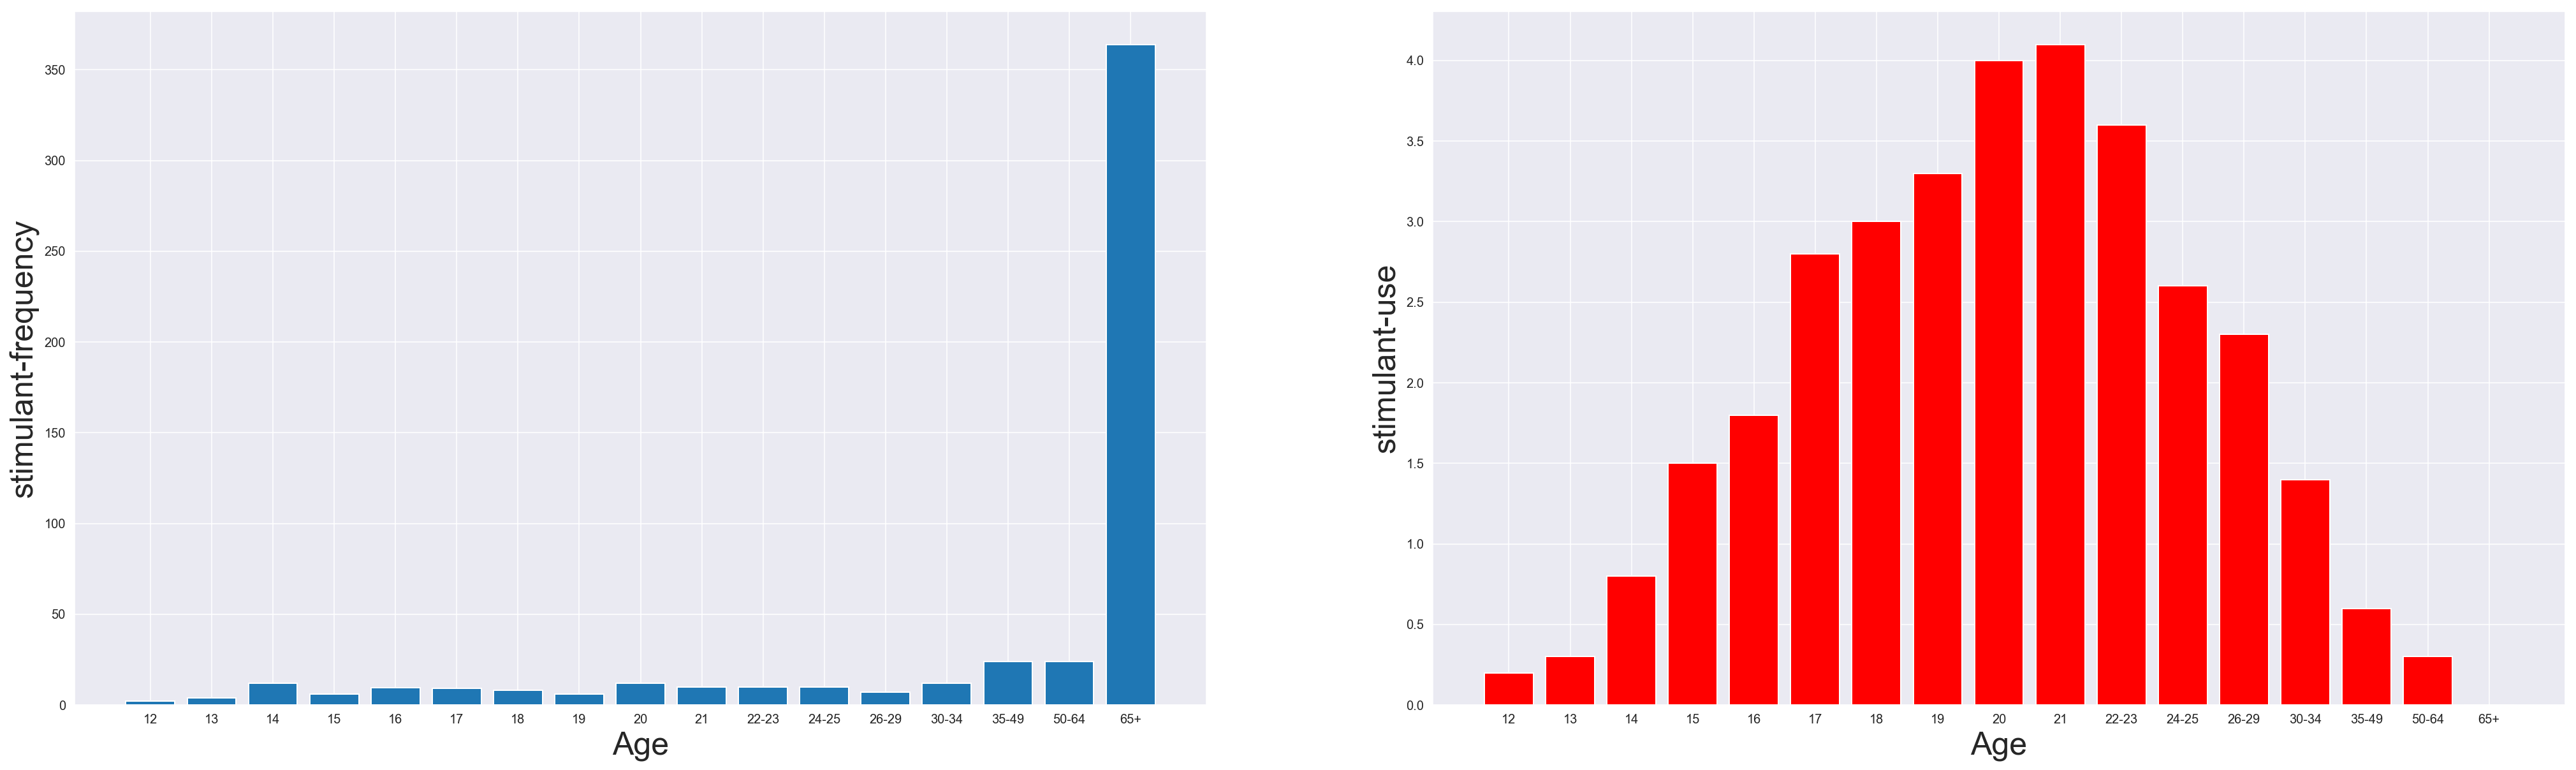

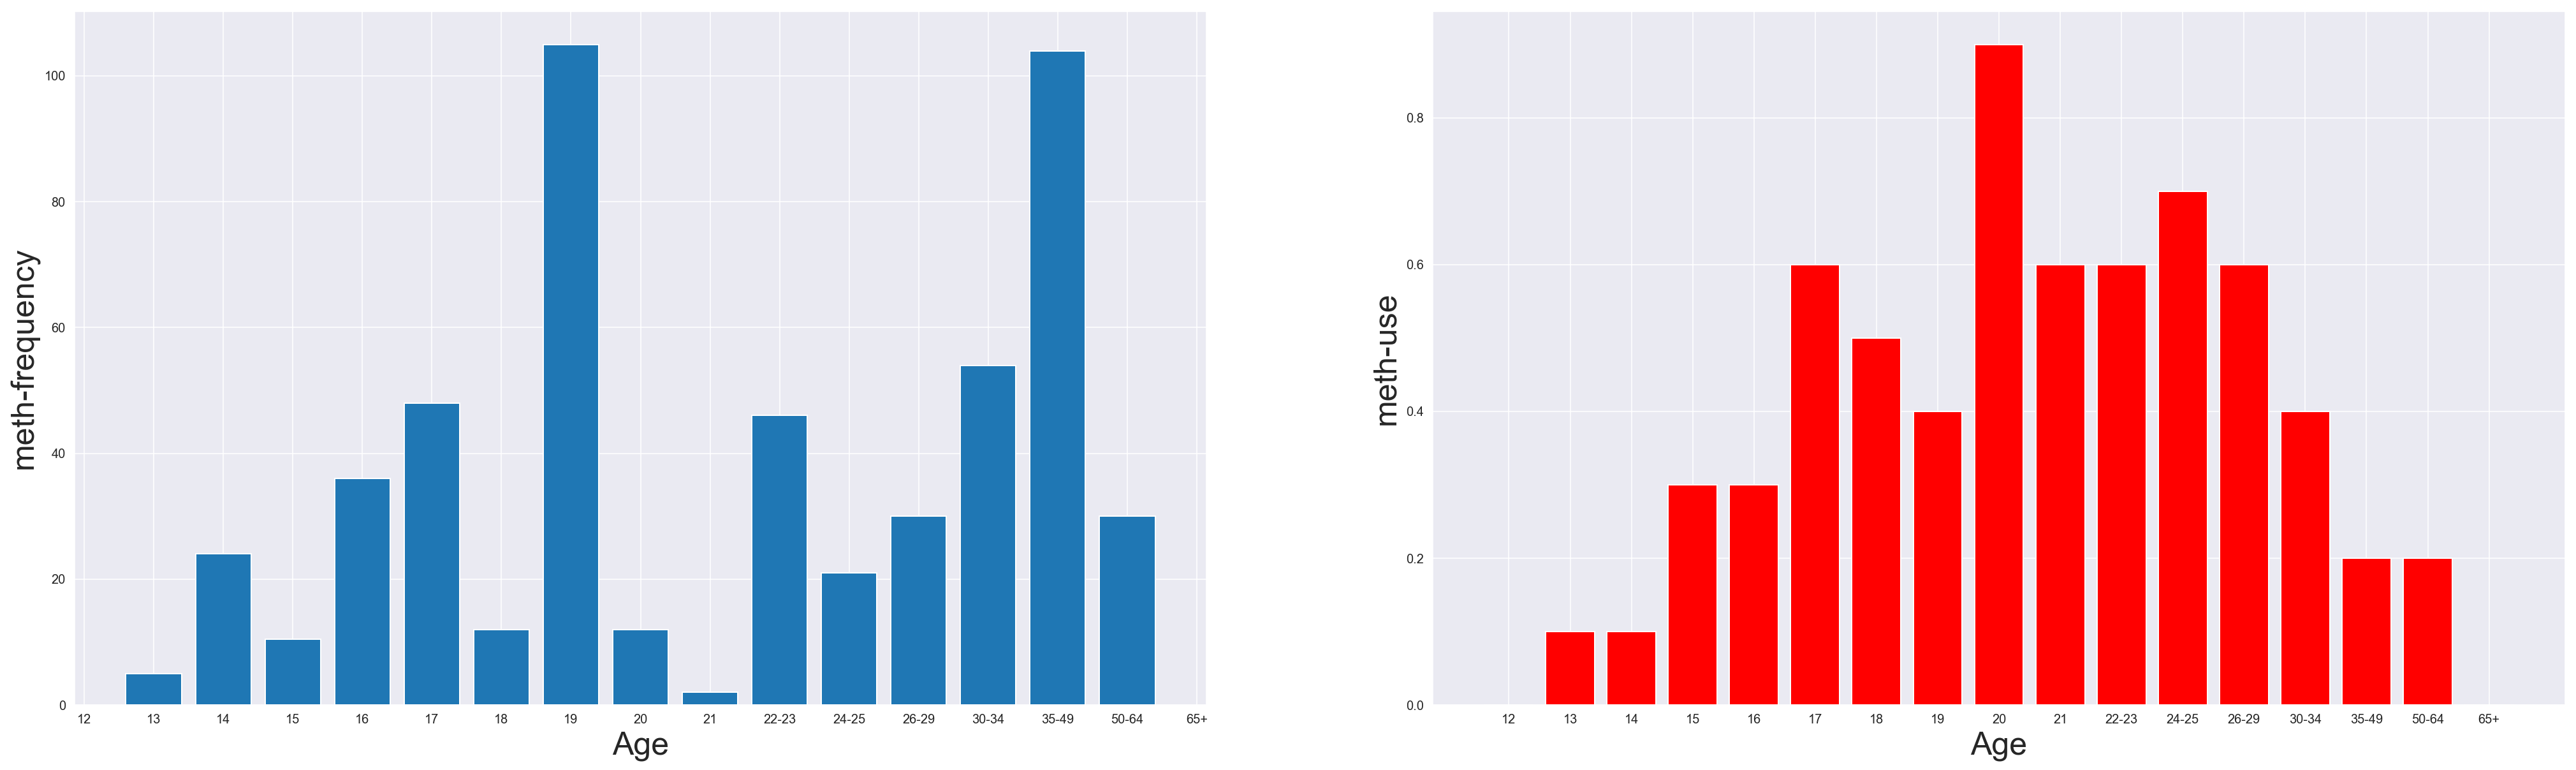

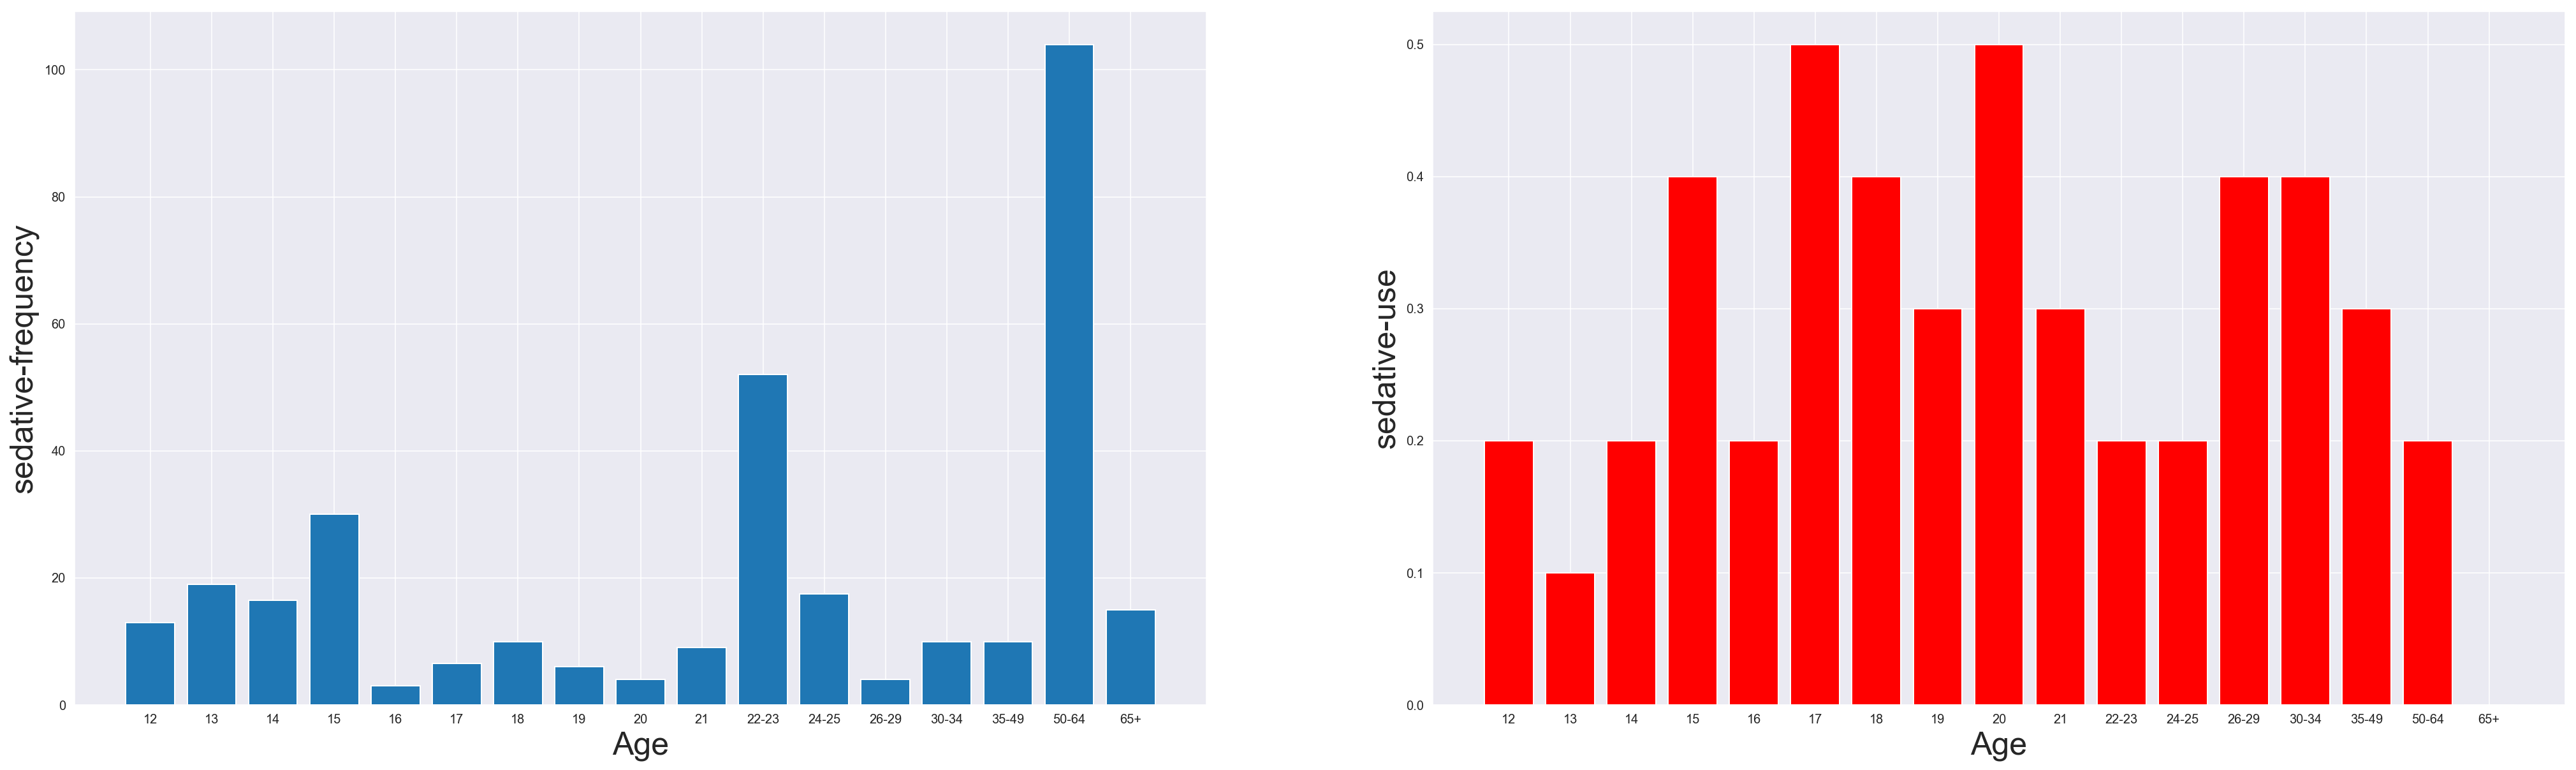

In [35]:
# Plot graphs comparing the differences in percentage of people who use each drug for each age group

for i in range(len(drug_freq_columns)):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (35, 10))
    
    ax1.bar(df_drug['age'], df_drug[drug_freq_columns[i]])
    ax1.set_xlabel('Age', size = 25)
    ax1.set_ylabel(drug_freq_columns[i], size = 25)
    
    ax2.bar(df_drug['age'], df_drug[drug_use_columns[i]], color = 'r')
    ax2.set_xlabel('Age', size = 25)
    ax2.set_ylabel(drug_use_columns[i], size = 25)

### It'll be interesting to group the drugs broadly into groups to assess if there are any interesting observations in terms of use and frequency for drugs in each category.

***Drug group 1: Depressants / Pain relief drugs***
(Drugs that suppress or slow activity of brain and nerves to create a calming or sedating effect)
- Marijuana
- Oxycontin
- Tranquilizer
- Heroin
- Pain reliever
- Alcohol
- Sedative


***Drug group 2: Stimulants***
(Drugs that accelerate the activity of the brain and nerves to make one feel energetic, focused and alert) 
- Cocaine
- Crack
- Stimulant
- Meth
- Inhalant

***Drug group 3: Hallucinogen***
(Drugs that increase a person's awareness of sight, touch, taste, feeling and hearing)
- Hallucinogen


Sources:
- https://www.betterhealth.vic.gov.au/health/healthyliving/cannabis-marijuana
- http://www.halton.ca/living_in_halton/public_health/health_wellness/drugs_alcohol_tobacco/types_of_drugs/

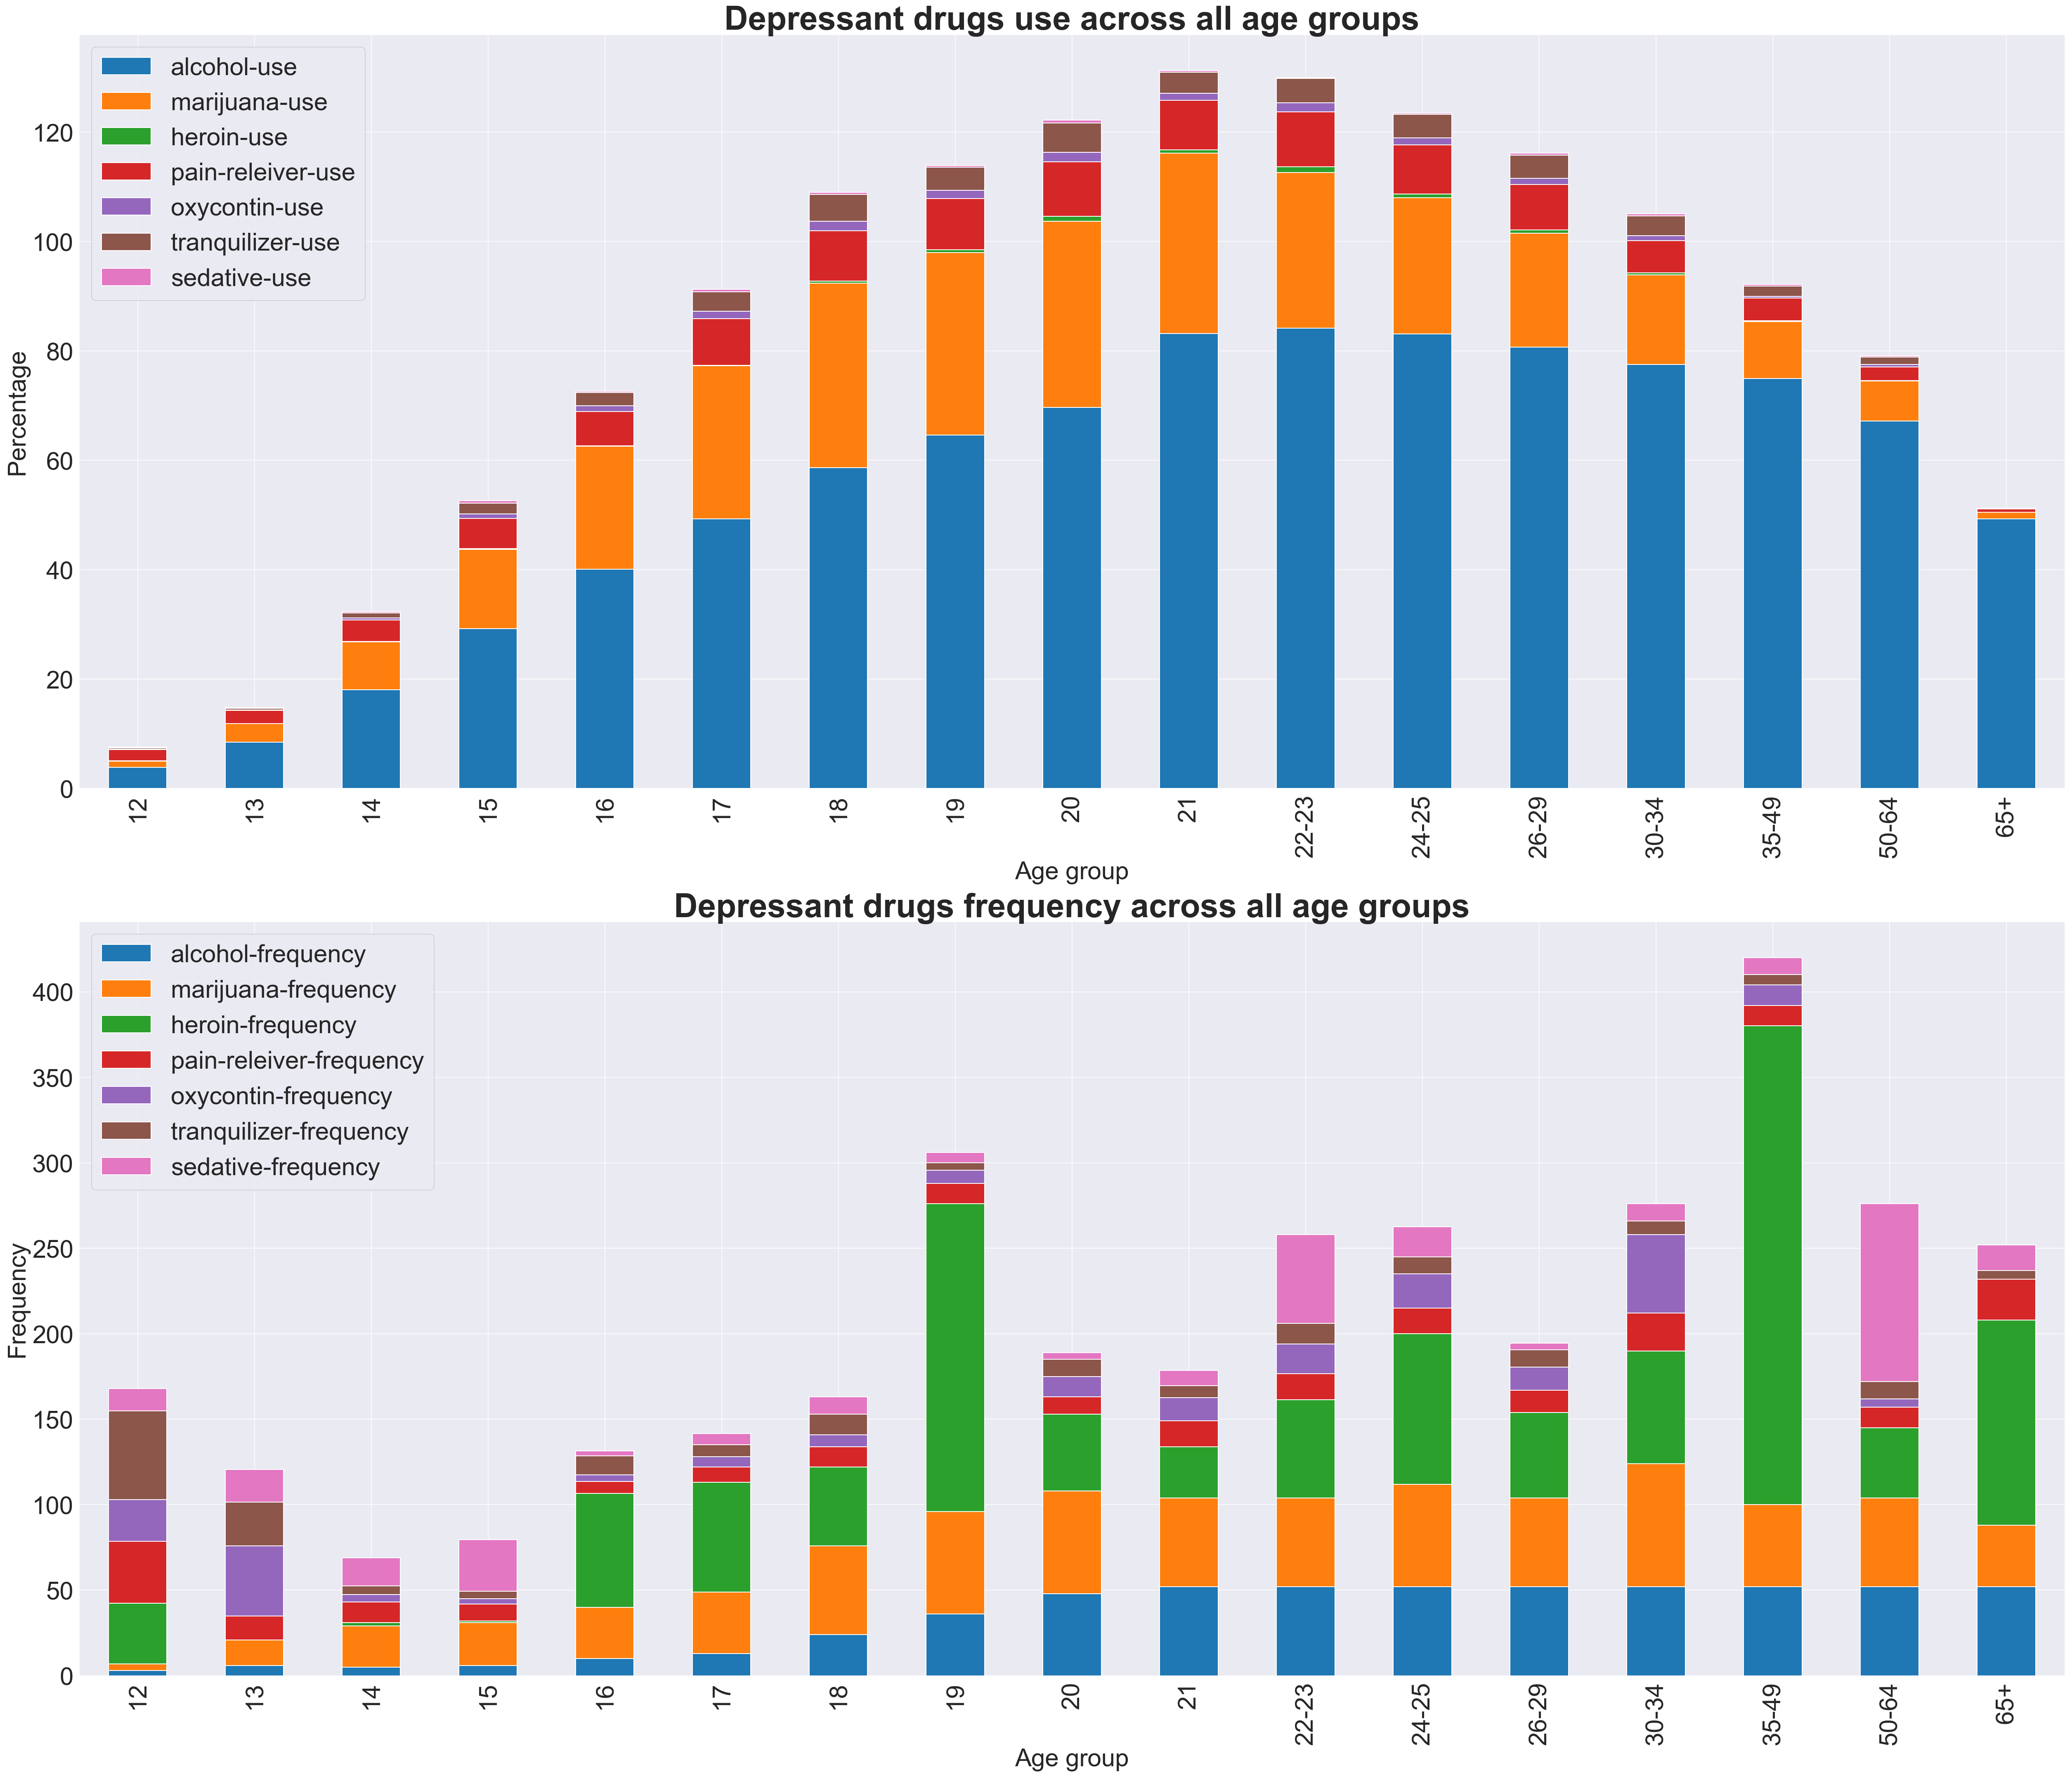

In [36]:
# plot use across Depressants

depressants_use = df_drug.loc[:,['age','alcohol-use', 'marijuana-use','heroin-use','pain-releiver-use','oxycontin-use', 'tranquilizer-use','sedative-use']]


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (35, 30))
depressants_use.set_index('age').plot(kind = 'bar', stacked = True, ax = ax1, fontsize = 30)
ax1.set_xlabel('Age group', size = 30)
ax1.set_ylabel('Percentage', size = 30)
ax1.set_title('Depressant drugs use across all age groups', size = 40, weight = 'bold')
ax1.legend(loc = 2, fontsize = 30)


# Given the large proportion alcohol takes up, a visualisation less alcohol is plotted
depressants_frequency = df_drug.loc[:,['age','alcohol-frequency', 'marijuana-frequency', 'heroin-frequency', 'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency', 'sedative-frequency']]


depressants_frequency.set_index('age').plot(kind='bar', stacked = True, ax = ax2, fontsize = 30)
ax2.set_xlabel('Age group', size = 30)
ax2.set_ylabel('Frequency', size = 30)
ax2.set_title('Depressant drugs frequency across all age groups', size = 40, weight = 'bold')
ax2.legend(loc = 2, fontsize = 30)

plt.tight_layout()

## Interesting observations from Depressant drugs:
- While alcohol percentage use is a lot higher relative to other drugs in general across all age groups, the median frequency that used alcohol is not as high. This indicates that many people do not use alcohol actively as a depressant, and more for occasional consumption. 


- Marijuana has a good mix of enjoying a high percentage of use by the samples across the age groups, while also having a signficant median consumption frequency relative to other drugs. 


- While the usage of Heroin among the respective samples are not high relative to other drugs, the frequency of consumption is the highest for many age groups beyond 16 years old. The same to a smaller extent can be said of Sedatives as well. 

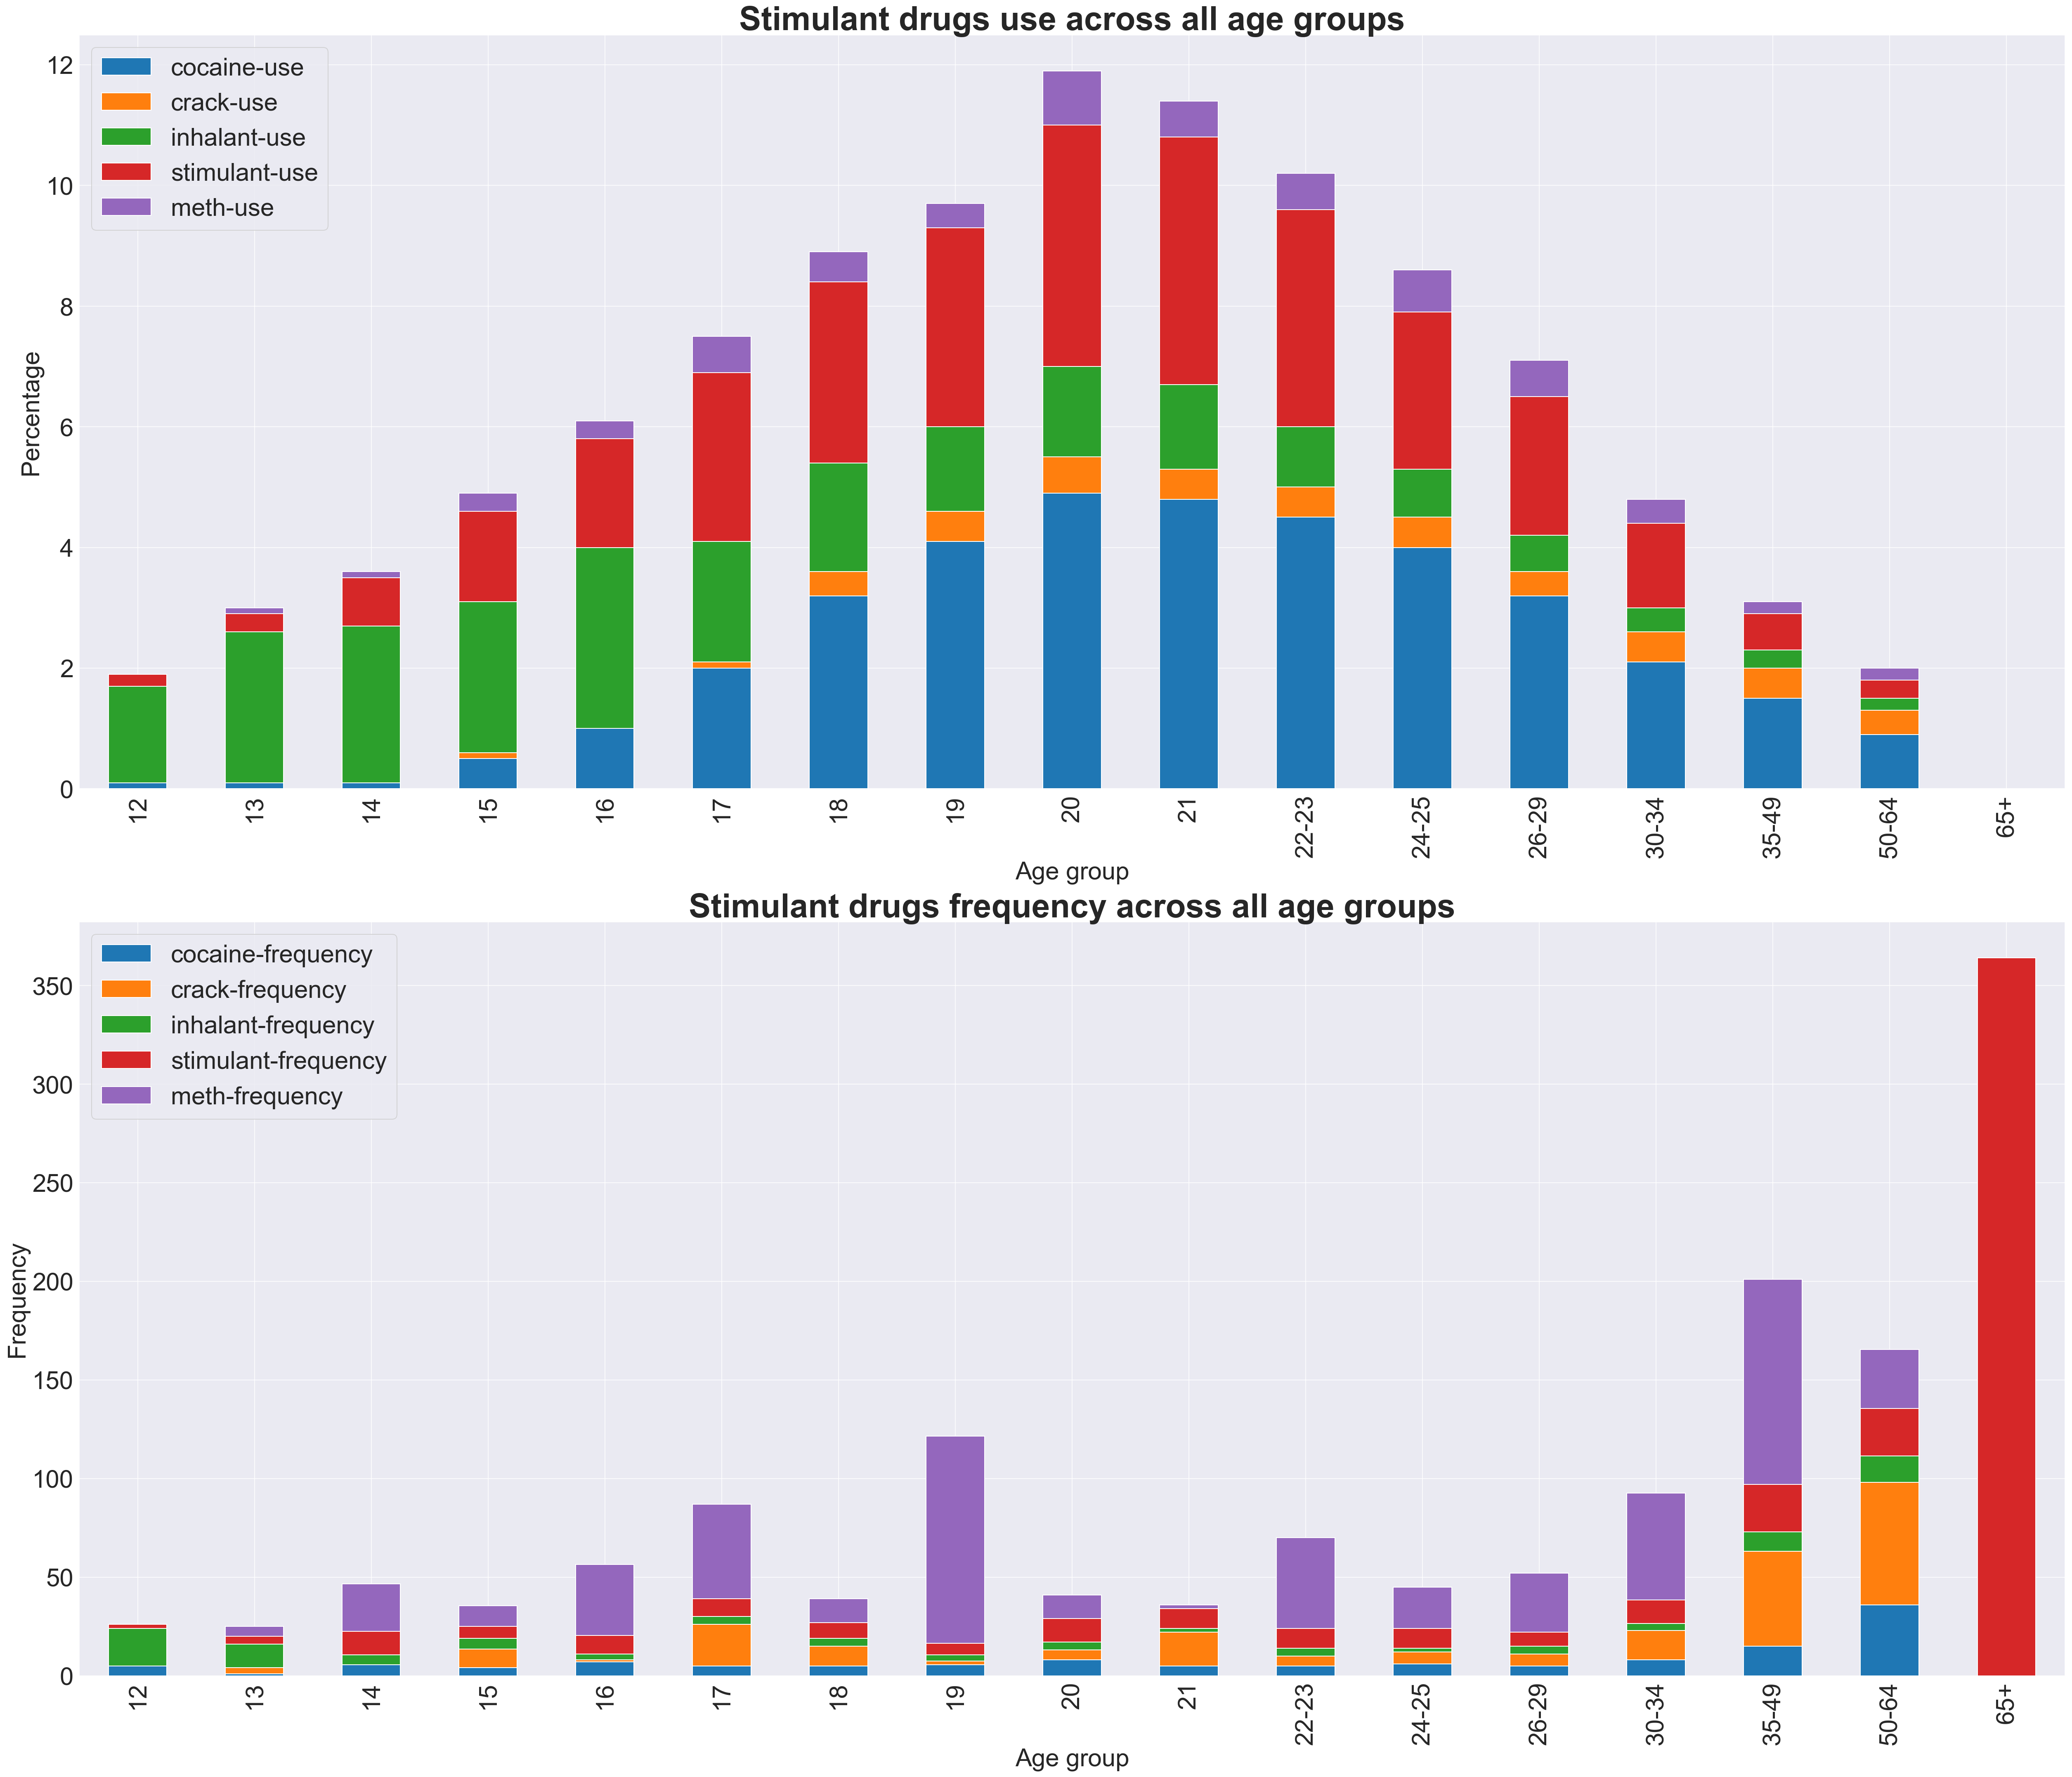

In [37]:
# plot use and frequency across Stimulants

stimulants_use = df_drug.loc[:,['age', 'cocaine-use', 'crack-use', 'inhalant-use', 'stimulant-use', 'meth-use']]


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (35, 30))
stimulants_use.set_index('age').plot(kind = 'bar', stacked = True, ax = ax1, fontsize = 30)
ax1.set_xlabel('Age group', size = 30)
ax1.set_ylabel('Percentage', size = 30)
ax1.set_title('Stimulant drugs use across all age groups', size = 40, weight = 'bold')
ax1.legend(loc = 2, fontsize = 30)


# Given the large proportion alcohol takes up, a visualisation less alcohol is plotted
stimulants_frequency = df_drug.loc[:,['age', 'cocaine-frequency', 'crack-frequency', 'inhalant-frequency', 'stimulant-frequency', 'meth-frequency']]


stimulants_frequency.set_index('age').plot(kind='bar', stacked = True, ax = ax2, fontsize = 30)
ax2.set_xlabel('Age group', size = 30)
ax2.set_ylabel('Frequency', size = 30)
ax2.set_title('Stimulant drugs frequency across all age groups', size = 40, weight = 'bold')
ax2.legend(loc = 2, fontsize = 30)

plt.tight_layout()

## Interesting observations from Stimulant charts:
- While Stimulants, inhalants and cocaine enjoy very high use across all age groups, frequency of use of these drugs are relatively lower than other drugs


- While the usage of Meth among the respective samples are one of the lowest relative to other drugs across all age groups, the frequency of consumption is the highest across almost all age groups. To a smaller extent, crack has a similar observation as well. 


- Stimulants have zero use but enjoy very high use among people above 65. This might be an error in the dataset that should be ignored. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### **Question**

As observed in the previous section, while Heroin and Meth enjoy relatively low usage as compared to other drugs across all age groups, the frequency of consumption is very high. This indicates that both drugs have high addiction levels. It'll be interesting to see what is the correlation between these two drugs based on their median use across all age groups. 


### **Hypothesis**
- H0 - There is not a significant linear relationship between the median frequency of use of Heroin and the median frequency of us of Meth in the population across all age groups (ie. correlation coefficient is NOT signficantly different from 0)

- H1 = There is a significant linear relationship between the median frequency of use of Heroin and the median frequency of us of Meth in the population across all age groups (ie. correlation coefficient is significantly different from 0)

In [38]:
# Preparing the dataset
heroin_meth = df_drug[['age', 'heroin-frequency', 'meth-frequency']]

# Drop NA rows for those with no data in any columns
heroin_meth = heroin_meth.dropna()
print(heroin_meth)
heroin_meth.count()

      age  heroin-frequency  meth-frequency
2      14               2.0            24.0
3      15               1.0            10.5
4      16              66.5            36.0
5      17              64.0            48.0
6      18              46.0            12.0
7      19             180.0           105.0
8      20              45.0            12.0
9      21              30.0             2.0
10  22-23              57.5            46.0
11  24-25              88.0            21.0
12  26-29              50.0            30.0
13  30-34              66.0            54.0
14  35-49             280.0           104.0
15  50-64              41.0            30.0


age                 14
heroin-frequency    14
meth-frequency      14
dtype: int64

In [39]:
# Given that the number of sample pairs is 14, the degree of freedom is 12. 
# Credits: http://www.mun.ca/biology/scarr/Critical_Values_of_r.htm
# At significance level of 0.05, the critical value is 0.532. 

critical_value = 0.532

correlation_heroin_meth = heroin_meth[['heroin-frequency', 'meth-frequency']].corr().iloc[0,1]


print("The correlation of heroin and meth median scores is {}".format(correlation_heroin_meth))

if correlation_heroin_meth > critical_value:
    print("\nWe reject our null hypothesis and conclude that there is a significant linear relationship between the median frequency of use of Heroin and the median frequency of us of Meth in the population across all age groups.")
elif correlation_heroin_meth <= critical_value:
    print("\nWe fail to reject our null hypothesis.")

The correlation of heroin and meth median scores is 0.8736183577203797

We reject our null hypothesis and conclude that there is a significant linear relationship between the median frequency of use of Heroin and the median frequency of us of Meth in the population across all age groups.


**Report on hypothesis testing**

The correlation of heroin and meth median scores is 0.8736183577203797

We reject our null hypothesis and conclude that there is a significant linear relationship between the median frequency of use of Heroin and the median frequency of us of Meth in the population across all age groups.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [40]:
#Pull out rate variable from the sat dataset

df_sat_less_rate = df_sat.drop('Rate', axis = 1)

df_sat_less_rate.head()

,State,Verbal,Math
0,CT,509,510
1,NJ,499,513
2,MA,511,515
3,NY,495,505
4,NH,520,516


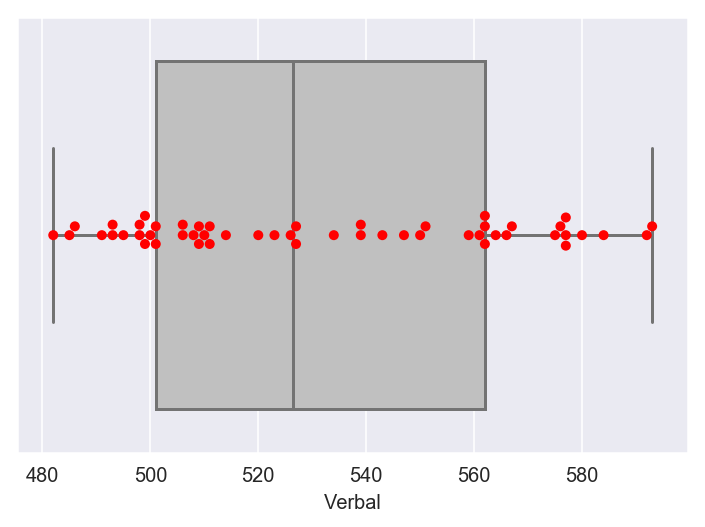

In [41]:
# Boxplot of 'Verbal' variable
sns.boxplot(df_sat_less_rate['Verbal'], color = 'silver')
sns.swarmplot(df_sat_less_rate['Verbal'], color = 'r', dodge = True);

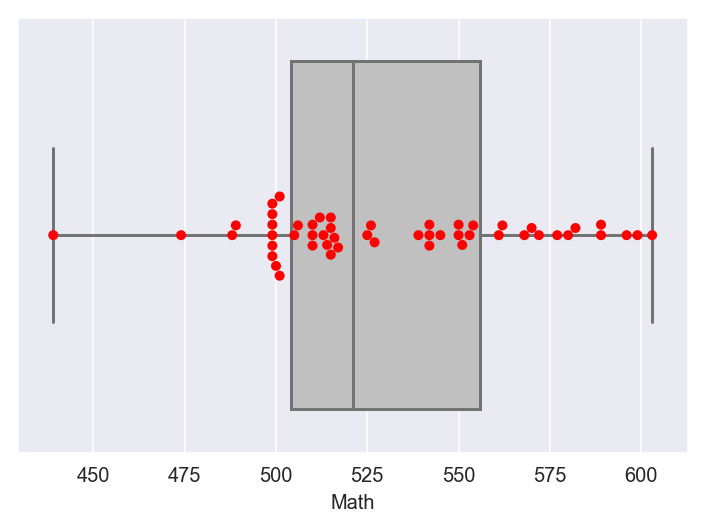

In [42]:
# Boxplot of 'Math' variable
sns.boxplot(df_sat_less_rate['Math'], color = 'silver')
sns.swarmplot(df_sat_less_rate['Math'], color = 'r', dodge = True);

**Observations from 'Math' and 'Verbal boxplots**

In the case of boxplots, outliers are data points that are outside of 1.5x of the interquartile range (both above and below of each of the datasets, beyond the 'whiskers' in the boxplot. Individually, each of 'Verbal' and 'Math' SAT scores don't look like there are any outliers beyond the whiskers. 

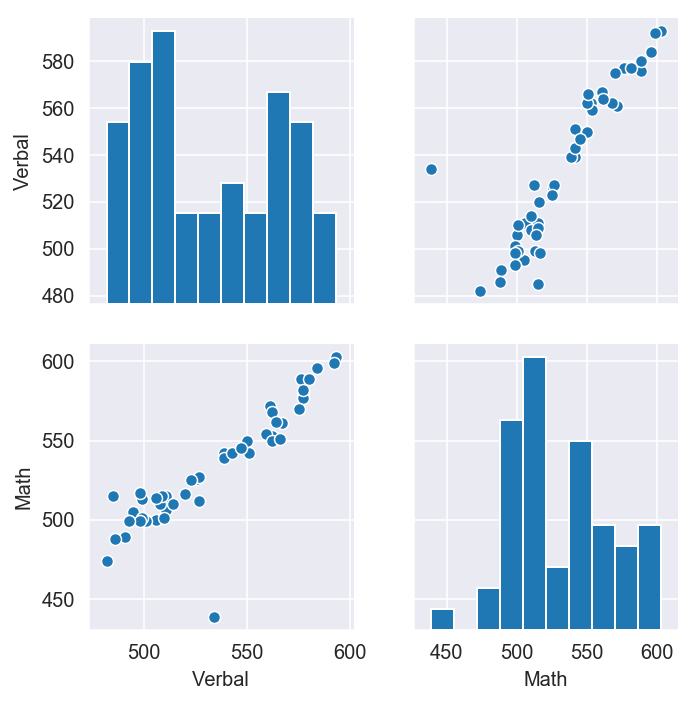

In [43]:
# Outliers when 'Verbal' and 'Math' scores are plotted against each other
sns.pairplot(df_sat_less_rate);

On visual inspection, there appears to be an outlier in the linear correlation graph, with the outlier having 'Math' score < 450 and 'Verbal' score between 500 to 550. 

In [44]:
# Print outlier in the dataset

outlier = df_sat_less_rate[(df_sat_less_rate['Math'] < 450) & (df_sat_less_rate['Verbal'] > 500) & (df_sat_less_rate['Verbal'] < 550)]

outlier.index

Int64Index([27], dtype='int64')

In [45]:
df_sat['Verbal'].describe()

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

In [46]:
# Remove outlier from dataset

df_sat_less_rate_and_outlier = df_sat_less_rate.drop(outlier.index).reset_index(drop = True)

In [47]:
# Statistics of 'cleaned' dataset without outliers

stats_cleaned = df_sat_less_rate_and_outlier.describe().reset_index()
stats_original = df_sat_less_rate.describe().reset_index()
stats_compare = stats_original.merge(stats_cleaned, on = 'index', suffixes = ['_original', '_cleaned'])

stats_compare['% Verbal_difference'] = (stats_compare['Verbal_cleaned'] - stats_compare['Verbal_original'])*100 / stats_compare['Verbal_original']
stats_compare['% Math_difference'] = (stats_compare['Math_cleaned'] - stats_compare['Math_original'])*100 / stats_compare['Math_original']

stats_compare

,index,Verbal_original,Math_original,Verbal_cleaned,Math_cleaned,% Verbal_difference,% Math_difference
0,count,52.000000,52.000000,51.000000,51.000000,-1.923077,-1.923077
1,mean,532.019231,531.500000,531.980392,533.313725,-0.007300,0.341247
2,std,33.236225,36.014975,33.565751,33.890111,0.991464,-5.899947
3,min,482.000000,439.000000,482.000000,474.000000,0.000000,7.972665
4,25%,501.000000,504.000000,501.000000,505.500000,0.000000,0.297619
5,50%,526.500000,521.000000,526.000000,525.000000,-0.094967,0.767754
6,75%,562.000000,555.750000,562.000000,557.500000,0.000000,0.314890
7,max,593.000000,603.000000,593.000000,603.000000,0.000000,0.000000


### Comparing the mean, median and std of the original and 'cleaned' dataset:

Verbal scores
- Mean has decreased by 0.007%. Change is negligible
- Standard deviation has increased by almost 1%
- Median has decreased by 0.01%. Change is negligible

Math scores
- Mean has decreased by 0.34%.
- Standard deviation has decreased by almost 6%
- Median has increased by 0.76%

Overall, there is fairly significant change in the standard deviation of the dataset. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### Comparison of spearman correlation vs pearson correlation

The pearson correlation is the measure of the strength of the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable. There is also the assumption that the variables should be approximately normally distributed. 


The spearman correlation is the measure of the monotonic relationship between two continuous or ordinal variables (i.e. how closely the variables move together). A relationship is monotonic when the two variables tend to change together, but not necessarily at a constant rate. 

Both correlations have a range of between -1 to 1, where -1 indicates a perfectly negative relationship while 1 indicates a perfectly positive relationship.

### Process of calculating spearman rank correlation

For n samples in two variable columns 'a' and 'b',

1) Create two new columns of 'rank(a)' and 'rank(b)'

2) Rank each value in column 'a' against other values in the same column in ascending or descending order. Put the rank of each corresponding value into the 'rank(a)' column

3) Repeat the same process for column 'b' values, in the same order per 2) and insert the rank to the 'rank(b)' column. 

4) Calculate the difference between 'rank(a)' and 'rank(b)' columns for each data point and input the difference into a new 'Difference' column. 

5) Square the values in the 'Difference' column into a new 'Square of difference' column and sum all the values in this column. Let's call the sum of all these values 'var'.


6) Use the formula (1 - 6*'var')/(n(n^2 - 1)) to calculate the spearman rank correlation value

In [48]:
# Calculate pearson correlation of Verbal and Math scores

print("Pearson correlation between Verbal and Math scores = {}".format(df_sat_less_rate.corr(method = 'pearson').iloc[0,1]))

Pearson correlation between Verbal and Math scores = 0.899870852544429


In [49]:
# Calculate spearman rank correlation of Verbal and Math scores

print("Spearman rank correlation between Verbal and Math scores = {}".format(df_sat_less_rate.corr(method = 'spearman').iloc[0,1]))

Spearman rank correlation between Verbal and Math scores = 0.9052048847940285


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [50]:
# Convert Rate to percentiles in the sat scores as a new column

df_sat['Rate_percentile'] = [stats.percentileofscore(df_sat['Rate'], line) for line in df_sat['Rate']]
df_sat['Rate_percentile'].head()

0    100.000000
1     98.076923
2     96.153846
3     94.230769
4     92.307692
Name: Rate_percentile, dtype: float64

In [51]:
# Percentile of California in Rate
df_sat[df_sat['State'] == 'CA'][['State','Rate','Rate_percentile']]

,State,Rate,Rate_percentile
23,CA,51,56.730769


In [52]:
# Rank each of the values based on the percentile in descending order (i.e. rank 1 for )
df_sat['Rank'] = df_sat['Rate_percentile'].rank(ascending = False)
df_sat.head()

,State,Rate,Verbal,Math,Rate_percentile,Rank
0,CT,82,509,510,100.000000,1.0
1,NJ,81,499,513,98.076923,2.0
2,MA,79,511,515,96.153846,3.0
3,NY,77,495,505,94.230769,4.0
4,NH,72,520,516,92.307692,5.0


**How is percentile related to spearman rank correlation?**

For the Spearman's rank coefficient between 2 variables to be calculated, the 2 variables have to be rank-ordered. Allocating a percentile rank to each observation against all observations of each variable helps to achieve that. 

The exercise above helps to allocate percentiles to each value in the 'Rate' column. The higher the Rate value, the higher the percentile score (or rank). This can then be compared with the percentiles of another selected variable (like Verbal or Math) to calculate the Spearman's rank coefficient between the 'Rate' column and that selected variable.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Percentile scoring can be useful for dealing with outliers because outliers may have an extreme ranking on one variable, but much less extreme on another variable. Outliers can be identified by looking at the trend of the differences in percentile ranking between the two variables. 